In [1]:
# Files in data/ must be downloaded from https://doi.org/10.5281/zenodo.10932490
graph_A:str = '../data/mgc_v2.9.0/mgc_graph_15_gfa1.gfa'
graph_B:str = '../data/pggb_v0.6.0/pggb_graph_15_yeast.gfa'
# Files in temp/* will be created during the execution of the notebook
edition_file: str = '../temp/yeast_edit.json'
reference:list[str] = ['CASBJU01']
chromosom:str = '1'
node_class_sizes:list[tuple] = [
    (0,1),
    (2,9),
    (10,49),
    (50,float('inf'))
]

In [2]:
# Colorblind-friendly palette
colors:dict[str,str] = {
    'blue':    '#377eb8', 
    'orange':  '#ff7f00',
    'green':   '#4daf4a',
    'pink':    '#f781bf',
    'brown':   '#a65628',
    'purple':  '#984ea3',
    'gray':    '#999999',
    'red':     '#e41a1c',
    'yellow':  '#dede00'
}

In [3]:
from json import load
from matplotlib import pyplot as plt
from pgGraphs import Graph
from os import system
from seaborn import regplot, violinplot, clustermap, scatterplot
from pandas import DataFrame
from scipy import stats
from collections import Counter
from statistics import mean,stdev,median
from numpy import arange, vstack
from subprocess import run,PIPE
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import squareform
from random import choice, choices, randint,seed
from tharospytools.matplotlib_tools import get_palette_from_list

In [4]:
# First, we compute edition to be sure to have a list of breakpoints
system(f'pancat compare {graph_A} {graph_B} -o {edition_file}')

Paths of Graph_A CASBIT01#0#CASBIT01#0, CASBIW01#0#CASBIW01#0, CASBIZ01#0#CASBIZ01#0, CASBJG01#0#CASBJG01#0, CASBJH01#0#CASBJH01#0, CASBJI01#0#CASBJI01#0, CASBJJ01#0#CASBJJ01#0, CASBJL01#0#CASBJL01#0, CASBJM01#0#CASBJM01#0, CASBJN01#0#CASBJN01#0, CASBJQ01#0#CASBJQ01#0, CASBJS01#0#CASBJS01#0, CASBJT01#0#CASBJT01#0, CASBJU01, CASBJV01#0#CASBJV01#0
Paths of Graph_B CASBJU01, CASBJM01, CASBJG01, CASBJL01, CASBIZ01, CASBIT01, CASBIW01, CASBJJ01, CASBJN01, CASBJI01, CASBJQ01, CASBJV01, CASBJS01, CASBJH01, CASBJT01
PATH SELECTION: {'CASBJU01'}
# Path CASBJU01 has 15583 equivalences, 2555 merges and 3743 splits


Processing path: CASBJU01
CASBJU01	3	S	2	24329
CASBJU01	4	M	3	24329
CASBJU01	5	M	3	24328
CASBJU01	6	M	3	24326
CASBJU01	8	M	5	24323
CASBJU01	9	M	5	24322
CASBJU01	10	S	5	24320
CASBJU01	11	S	6	24320
CASBJU01	15	S	21	24315
CASBJU01	21	S	28	24309
CASBJU01	24	M	30	24308
CASBJU01	28	M	30	24307
CASBJU01	42	M	40	24295
CASBJU01	44	M	40	24294
CASBJU01	45	M	40	24293
CASBJU01	50	M	45	24287
CASBJU01	51	M	45	24286
CASBJU01	58	M	51	24279
CASBJU01	60	M	51	24278
CASBJU01	61	M	51	24277
CASBJU01	65	S	52	24275
CASBJU01	66	M	53	24275
CASBJU01	67	M	53	24274
CASBJU01	69	M	54	24271
CASBJU01	75	S	57	24268
CASBJU01	80	M	59	24268
CASBJU01	81	M	59	24267
CASBJU01	83	S	60	24264
CASBJU01	87	M	61	24264
CASBJU01	88	S	61	24262
CASBJU01	89	S	62	24262
CASBJU01	100	M	65	24261
CASBJU01	114	S	68	24257
CASBJU01	117	S	70	24257
CASBJU01	118	M	72	24257
CASBJU01	124	M	74	24253
CASBJU01	125	M	74	24252
CASBJU01	128	M	74	24251
CASBJU01	130	M	74	24249
CASBJU01	135	M	74	24248
CASBJU01	143	M	74	24246
CASBJU01	144	M	74	24245
CASBJU01	14

0

In [5]:
editions:dict[str,list] = load(open(edition_file,'r',encoding='utf-8'))

cactus_gfa:Graph = Graph(graph_A)
pggb_gfa:Graph = Graph(graph_B)

In [6]:
cactus_gfa.sequence_offsets()
pggb_gfa.sequence_offsets()

In [7]:
# Affichage des tailles de chemins, tailles des noeuds
graph_A_node_sizes: dict[str,int] = {node_name:node_datas['length'] for node_name,node_datas in cactus_gfa.segments.items()}
graph_B_node_sizes: dict[str,int] = {node_name:node_datas['length'] for node_name,node_datas in pggb_gfa.segments.items()}

In [8]:
nodes_greater_50:int = len([node for node in graph_A_node_sizes if graph_A_node_sizes[node] >= 50]) + len([node for node in graph_B_node_sizes if graph_B_node_sizes[node] >= 50])
all_nodes:int = len(graph_A_node_sizes) + len(graph_B_node_sizes)

print(f'Number of nodes greater than 50bp: {nodes_greater_50} ({nodes_greater_50/all_nodes*100:.2f}%)')

print(sum([graph_A_node_sizes[node] for node in graph_A_node_sizes if graph_A_node_sizes[node] >= 50])/sum(node for node in graph_A_node_sizes.values()))
print(sum([graph_B_node_sizes[node] for node in graph_B_node_sizes if graph_B_node_sizes[node] >= 50])/sum(node for node in graph_B_node_sizes.values()))

Number of nodes greater than 50bp: 2855 (4.60%)
0.665517518253847
0.6762295081967213


In [9]:
# Edition size calculation
# We compute the number of basepairs that are in the edition
# For each edition, we extract the node name, then we compare the position of the edition to the borders of the node

edition_sizes:list[int] = list()
lengths_nodes_edit:list[int] = list()
all_edited_nodes_A:set[str] = set()
all_edited_nodes_B:set[str] = set()

# We iterate over the edition file
for path_name, edition_classes in editions.items():
    # We iterate over the classes of edition
    for edition, [node_A,node_B] in edition_classes['splits']:
        # A merge means that two nodes are merged in the second graph
        # We compute the size of the edition by taking the length of the node in the second graph
        for start,end,_ in pggb_gfa.segments[node_B]['PO'][path_name]:
            if min(start,end) <= edition <= max(start,end):
                all_edited_nodes_B.add(node_B)
                edition_sizes.append(min(abs(start-edition),abs(end-edition)))
                lengths_nodes_edit.append(pggb_gfa.segments[node_B]['length'])
                break
    for edition, [node_A,node_B] in edition_classes['merges']:
        # A merge means that two nodes are merged in the second graph
        # We compute the size of the edition by taking the length of the node in the second graph
        for start,end,_ in cactus_gfa.segments[node_A]['PO'][path_name]:
            if min(start,end) <= edition <= max(start,end):
                all_edited_nodes_A.add(node_A)
                edition_sizes.append(min(abs(start-edition),abs(end-edition)))
                lengths_nodes_edit.append(cactus_gfa.segments[node_A]['length'])
                break
        
        

In [10]:
# Percentage of edition_sizes equal to 1
per_1:float = edition_sizes.count(1)/len(edition_sizes)*100
per_5:float = 0

for i in range(1,6):
    per_5 += edition_sizes.count(i)/len(edition_sizes)*100

print(f'Percentage of edition sizes equal to 1: {per_1:.2f}%')
print(f'Percentage of edition sizes equal to 1-5: {per_5:.2f}%')

Percentage of edition sizes equal to 1: 28.10%
Percentage of edition sizes equal to 1-5: 67.02%


6.686725944744364 10.768404591426396 3.0 132 1


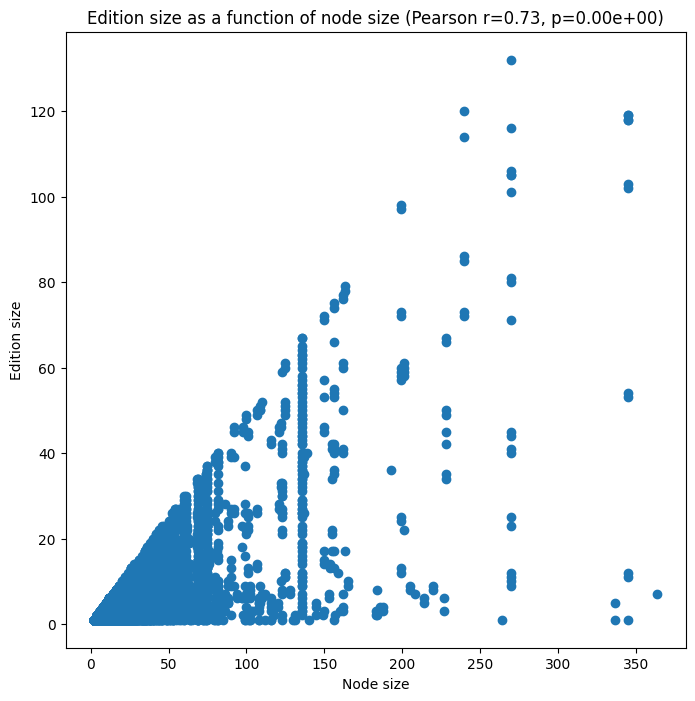

In [11]:
# Print some statistics
print(mean(edition_sizes),stdev(edition_sizes),median(edition_sizes),max(edition_sizes),min(edition_sizes))

# Link between node size and edition size
# We plot the edition size as a function of the node size
# We compute the Pearson correlation coefficient
fig, ax = plt.subplots(figsize=(8,8))
r,p = stats.pearsonr(lengths_nodes_edit,edition_sizes)
ax.set_xlabel('Node size')
ax.set_ylabel('Edition size')
ax.set_title('Edition size as a function of node size (Pearson r={:.2f}, p={:.2e})'.format(r,p))
ax.scatter(lengths_nodes_edit,edition_sizes)
plt.show()


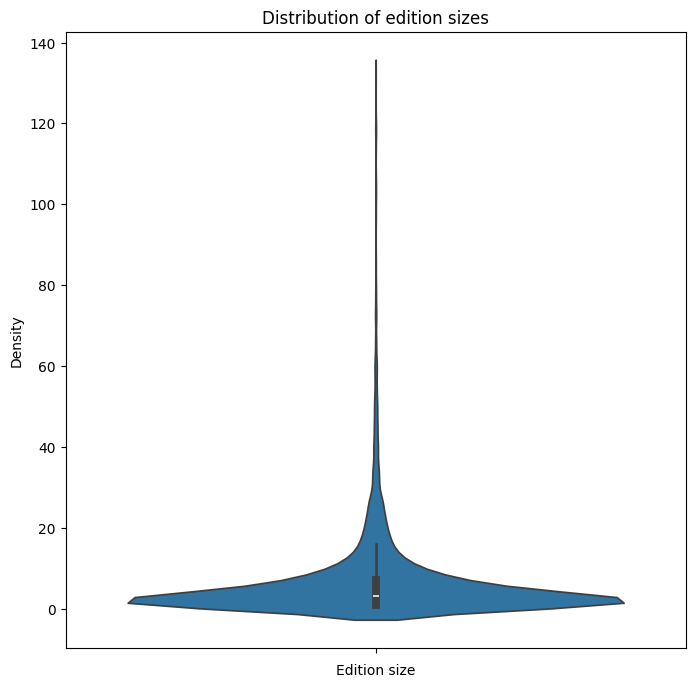

In [12]:
# Plot of the distribution of edition sizes
fig, ax = plt.subplots(figsize=(8,8))
ax.set_xlabel('Edition size')
ax.set_ylabel('Density')
ax.set_title('Distribution of edition sizes')
violinplot(data=edition_sizes,ax=ax)
plt.show()


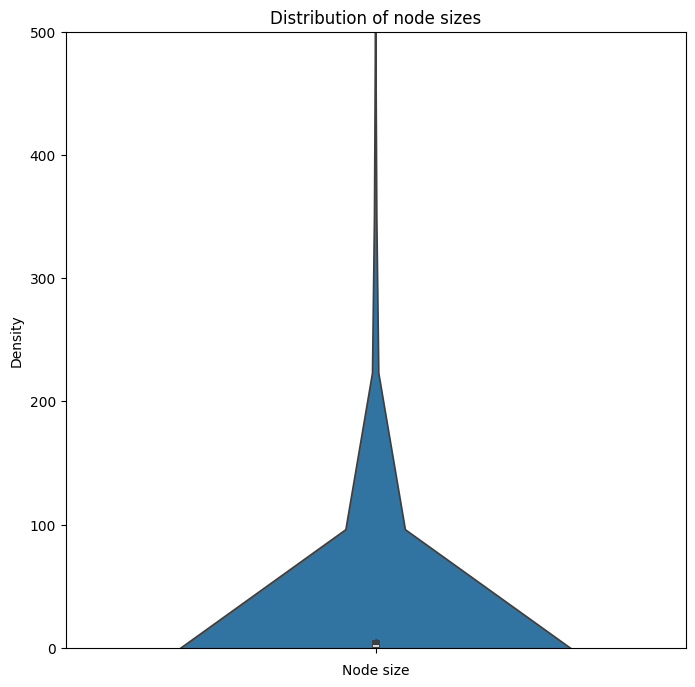

In [13]:
# Distribution of node sizes
fig, ax = plt.subplots(figsize=(8,8))
ax.set_xlabel('Node size')
ax.set_ylabel('Density')
ax.set_title('Distribution of node sizes')
violinplot(data=graph_A_node_sizes,ax=ax)
plt.ylim(0,500)
plt.show()

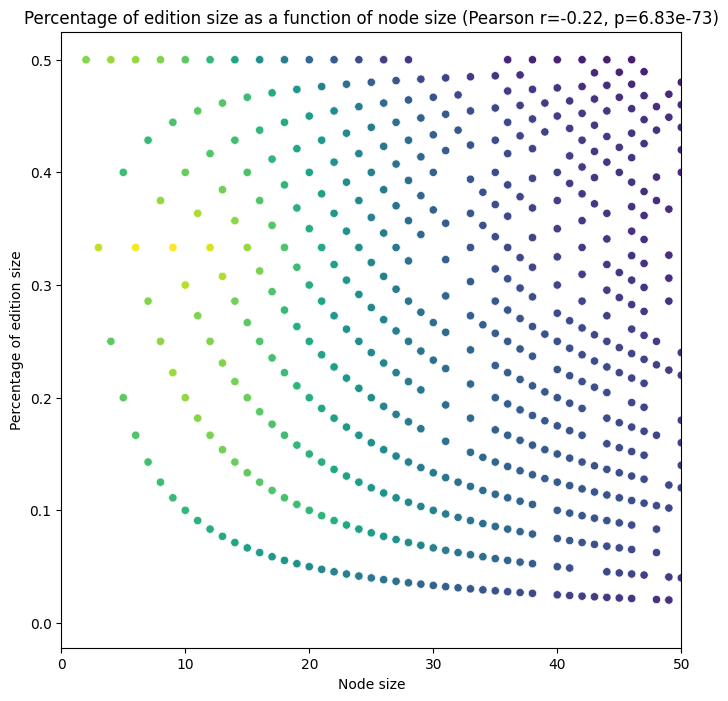

In [14]:
# Percentage of edition size as a function of node size
# We compute the percentage of edition size as a function of the node size
# We plot the distribution of the percentage of edition size
# We compute the Pearson correlation coefficient
percentage_edition_size:list[float] = [edition_size/length for edition_size,length in zip(edition_sizes,lengths_nodes_edit)]
fig, ax = plt.subplots(figsize=(8,8))
r,p = stats.pearsonr(lengths_nodes_edit,percentage_edition_size)
ax.set_xlabel('Node size')
ax.set_xlim(0,50)
ax.set_ylabel('Percentage of edition size')
ax.set_title('Percentage of edition size as a function of node size (Pearson r={:.2f}, p={:.2e})'.format(r,p))
values = vstack([lengths_nodes_edit,percentage_edition_size])
kernel = stats.gaussian_kde(values)(values)
scatterplot(
    x=lengths_nodes_edit,
    y=percentage_edition_size,
    c=kernel,
    ax=ax,
    cmap="viridis",
)
#ax.scatter(lengths_nodes_edit,percentage_edition_size)
plt.show()


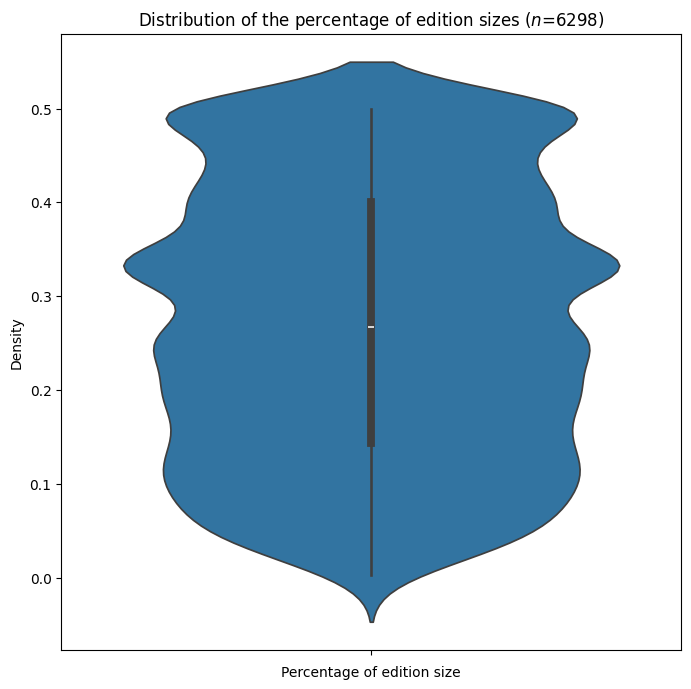

In [15]:
# histogram of the percentage of edition size
fig, ax = plt.subplots(figsize=(8,8))
ax.set_xlabel('Percentage of edition size')
ax.set_ylabel('Density')
ax.set_title('Distribution of the percentage of edition sizes ($n$={})'.format(len(lengths_nodes_edit)))
violinplot(data=percentage_edition_size,ax=ax)
plt.show()

In [16]:
x = [percentage for percentage,length in zip(percentage_edition_size,lengths_nodes_edit) if length >= 50]
dx = len(x)

smaller_10 = len([percentage for percentage in x if percentage < 0.1])
smaller_25 = len([percentage for percentage in x if percentage < 0.25])
smaller_5 = len([percentage for percentage in x if percentage < 0.05])

print(f'Percentage of edition size smaller than 5%: {smaller_5/dx*100:.2f}%')
print(f'Percentage of edition size smaller than 10%: {smaller_10/dx*100:.2f}%')
print(f'Percentage of edition size smaller than 25%: {smaller_25/dx*100:.2f}%')

print(f'Percentage of editions on nodes greater or equal to 50bp: {dx/len(percentage_edition_size)*100:.2f}%')


Percentage of edition size smaller than 5%: 16.84%
Percentage of edition size smaller than 10%: 30.46%
Percentage of edition size smaller than 25%: 59.41%
Percentage of editions on nodes greater or equal to 50bp: 16.78%


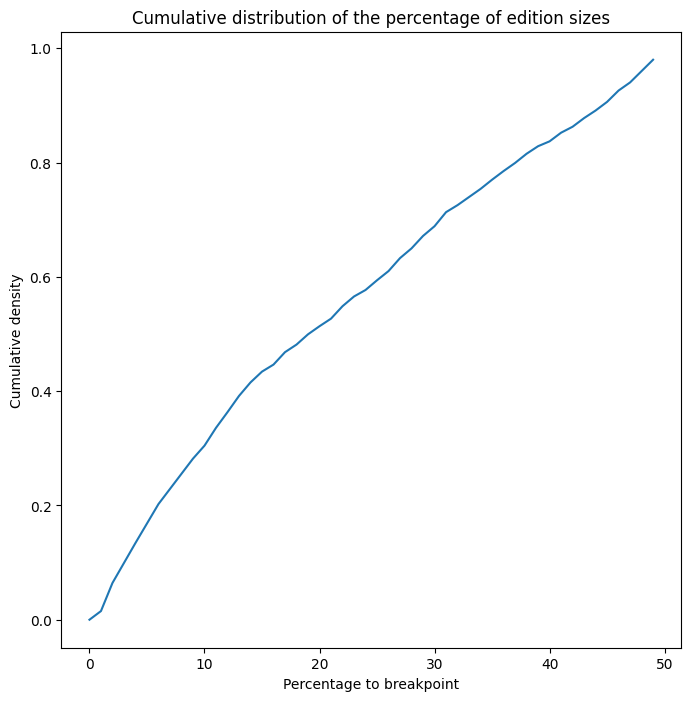

In [17]:
# Plot the curve of the percentage of editions smaller than a given percentage
fig, ax = plt.subplots(figsize=(8,8))
ax.set_xlabel('Percentage to breakpoint')
ax.set_ylabel('Cumulative density')
#ax.set_yscale('log')
ax.set_title('Cumulative distribution of the percentage of edition sizes')
ax.plot([len([percentage for percentage in x if percentage < i])/dx for i in arange(0,0.5,0.01)])
plt.show()

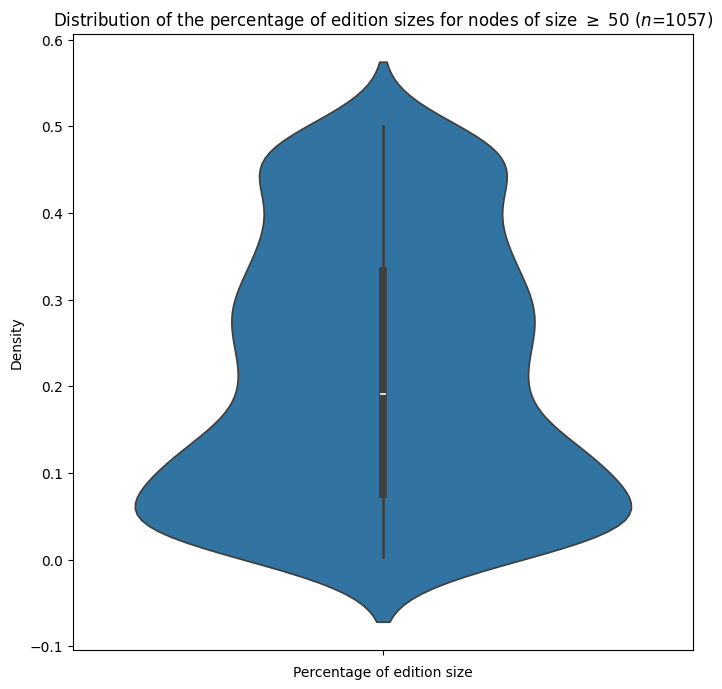

In [18]:
# histogram of the percentage of edition size for nodes of size >= 50
fig, ax = plt.subplots(figsize=(8,8))
ax.set_xlabel('Percentage of edition size')
ax.set_ylabel('Density')
ax.set_title('Distribution of the percentage of edition sizes for nodes of size $\geq$ 50 ($n$={})'.format(len([length for length in lengths_nodes_edit if length >= 50])))
violinplot(data=[percentage for percentage,length in zip(percentage_edition_size,lengths_nodes_edit) if length >= 50],ax=ax)
plt.show()

In [19]:
import numpy as np
import scipy.stats as stats

points = [percentage for percentage,length in zip(percentage_edition_size,lengths_nodes_edit) if length >= 50]

n_bins = 10
bin_edges = np.linspace(0, .5, n_bins + 1)

observed, _ = np.histogram(points, bins=bin_edges)

expected = np.full_like(observed, np.mean(observed))
expected = expected * (np.sum(observed) / np.sum(expected))

chi2_stat, p_value = stats.chisquare(observed, expected)

print(f"Statistique de khi-2 : {chi2_stat:.4f}")
print(f"Valeur p : {p_value:.4f}")

if p_value < 0.05:
    print("Non-uniform distribution.")
else:
    print("Not enough proof to say that the distribution is not uniform.")


Statistique de khi-2 : 110.3132
Valeur p : 0.0000
Non-uniform distribution.


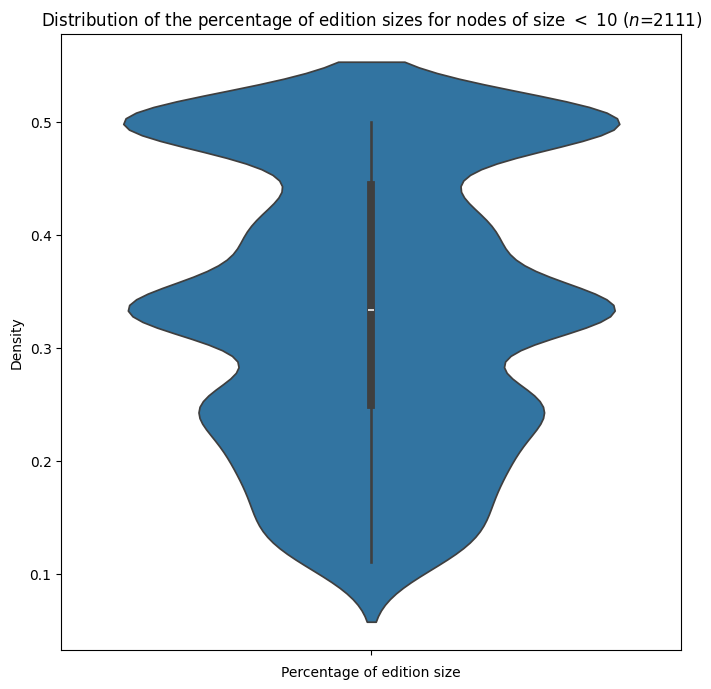

In [20]:
# histogram of the percentage of edition size for nodes of size < 50
fig, ax = plt.subplots(figsize=(8,8))
ax.set_xlabel('Percentage of edition size')
ax.set_ylabel('Density')
ax.set_title('Distribution of the percentage of edition sizes for nodes of size $<$ 10 ($n$={})'.format(len([length for length in lengths_nodes_edit if length < 10])))
violinplot(data=[percentage for percentage,length in zip(percentage_edition_size,lengths_nodes_edit) if length < 10],ax=ax)
plt.show()

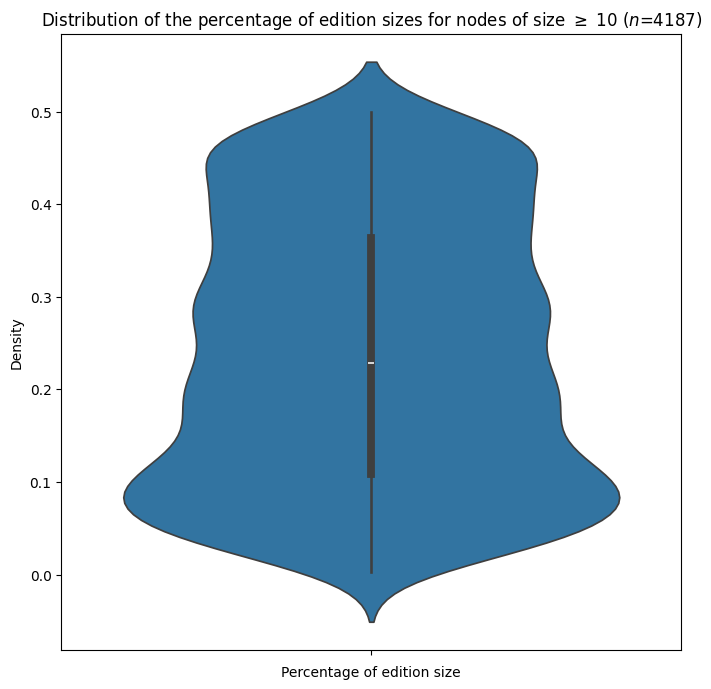

In [21]:
# histogram of the percentage of edition size for nodes of size >= 10
fig, ax = plt.subplots(figsize=(8,8))
ax.set_xlabel('Percentage of edition size')
ax.set_ylabel('Density')
ax.set_title('Distribution of the percentage of edition sizes for nodes of size $\geq$ 10 ($n$={})'.format(len([length for length in lengths_nodes_edit if length >= 10])))
violinplot(data=[percentage for percentage,length in zip(percentage_edition_size,lengths_nodes_edit) if length >= 10],ax=ax)
plt.show()

[0.  0.2 0.4 0.6 0.8 1. ]


/tmp/ipykernel_113375/204278347.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(['0%'] + ['{:,.0%}'.format(x/2) for x in ax.get_yticks()])


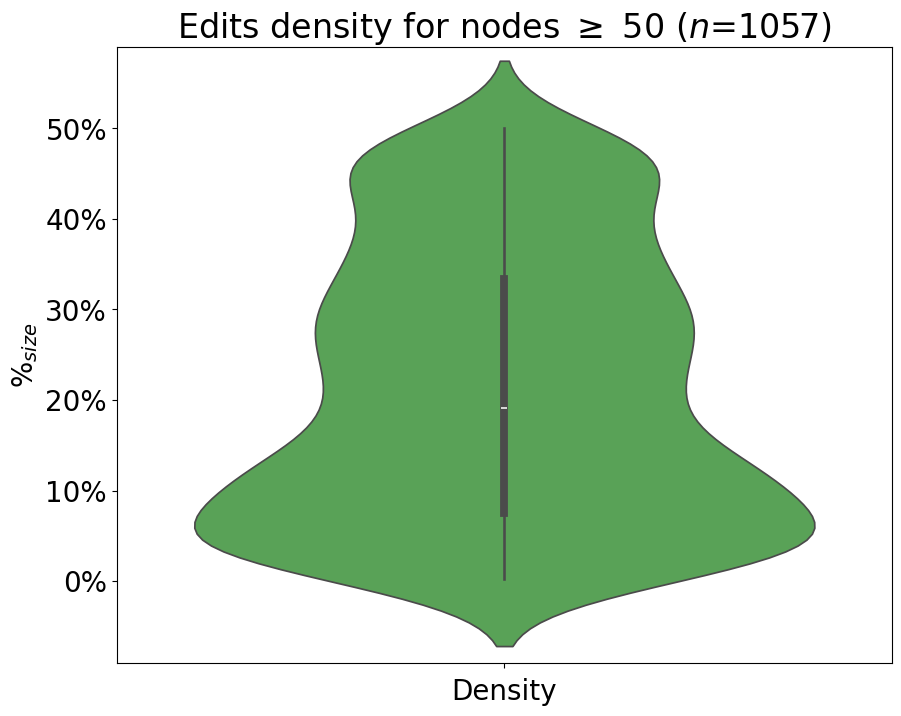

In [22]:
from matplotlib import rc
font = {'size': 20}
rc('font', **font)

for i in [50]: # 2,3,4,5,6,7,8,9,10,15,20,25,30,35,40,45,
    # histogram of the percentage of edition size for nodes of size >= i
    fig, ax = plt.subplots(figsize=(10,8))
    ax.set_ylabel('$\%_{size}$') # Edition position as a percentage of size
    print( ax.get_yticks())
    ax.set_yticklabels(['0%'] + ['{:,.0%}'.format(x/2) for x in ax.get_yticks()])
    ax.set_xlabel('Density')
    #ax.text(.005,.92, "B)",horizontalalignment='left',transform=ax.transAxes, fontdict={'size': 40})
    ax.set_title('Edits density for nodes $\geq$ {} ($n$={})'.format(i,len([length for length in lengths_nodes_edit if length >= i])))
    plt.ylim(-.09,.59)
    violinplot(data=[percentage for percentage,length in zip(percentage_edition_size,lengths_nodes_edit) if length >= i],ax=ax,color=colors['green'])
    #plt.savefig(f'temp/percentage_edition_size_{i}.png')
    plt.savefig("SF2B.eps")

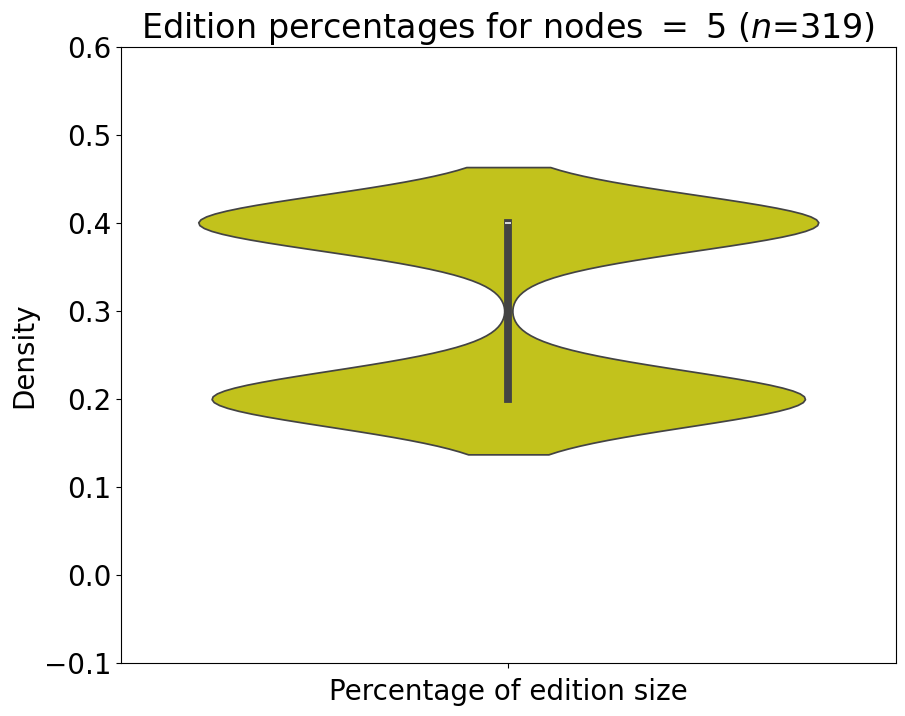

In [23]:
for i in range(5,6):
    # histogram of the percentage of edition size for nodes of size >= i
    fig, ax = plt.subplots(figsize=(10,8))
    ax.set_xlabel('Percentage of edition size')
    ax.set_ylabel('Density')
    ax.set_title('Edition percentages for nodes $=$ {} ($n$={})'.format(i,len([length for length in lengths_nodes_edit if length == i])))
    plt.ylim(-.1,.6)
    violinplot(data=[percentage for percentage,length in zip(percentage_edition_size,lengths_nodes_edit) if length == i],ax=ax,color=colors['yellow'])
    #plt.savefig(f'temp/percentage_equal_size_{i}.png')

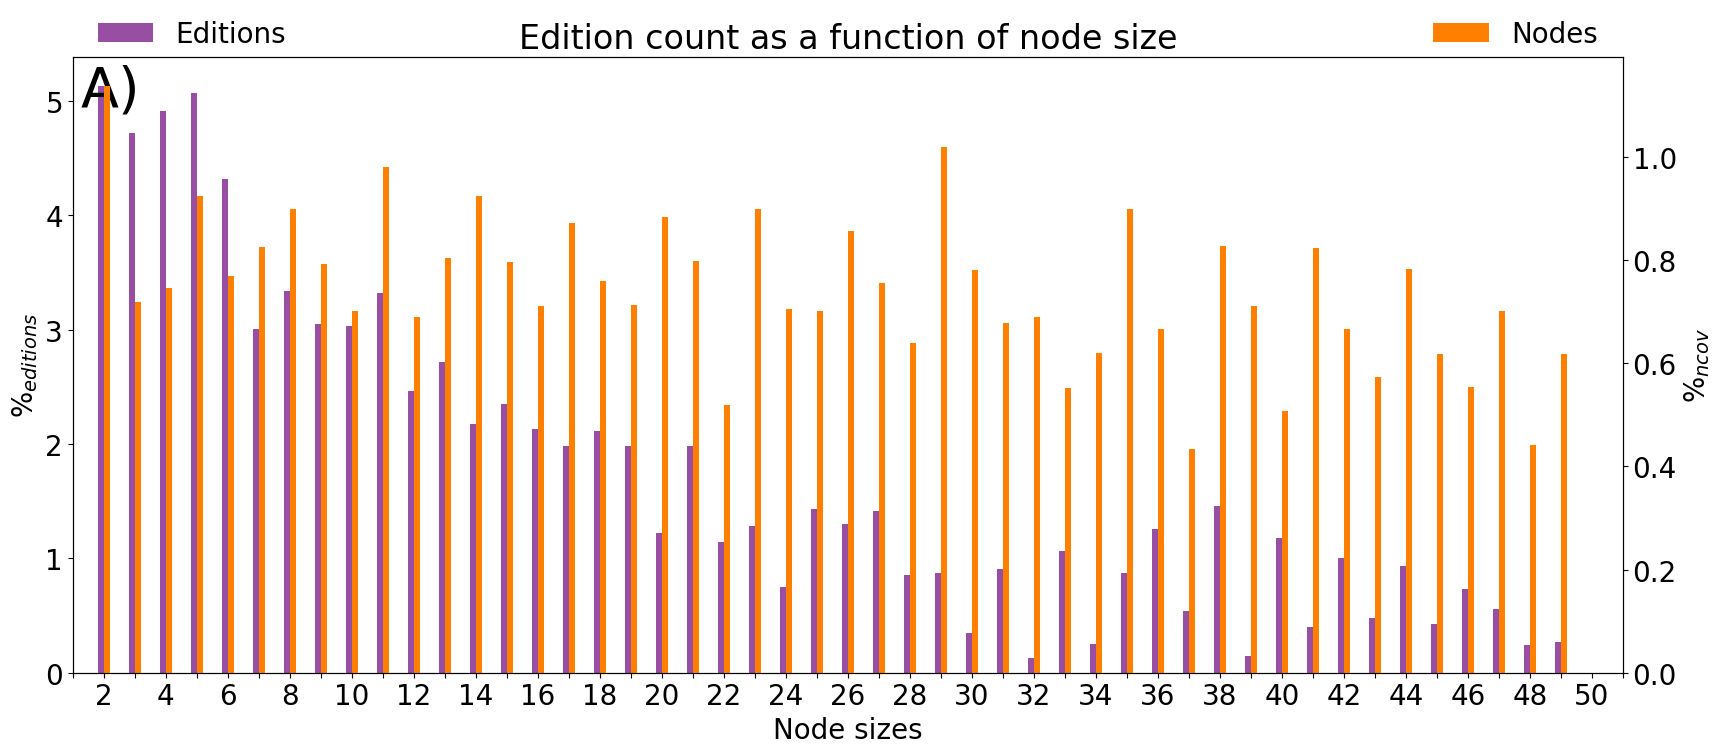

Percentage of nodes of size greater or equal to 50bp: 97.14%
Percentage of editions of size greater or equal to 50bp: 16.78%


In [24]:
# Comparaison du nombre d'éditions sur les noeuds d'une taille x et la proportion de noeuds d'une taille x dans le graphe
node_class_sizes:list[tuple] = [
    (i,i+1) for i in range(1,52,1)
]

edits_geq50:int = 0
edits_sizes_geq50:int = 0
nodes_geq50:int = 0
nodes_sizes_geq50:int = 0

x = arange(len(node_class_sizes))
width=0.20
multiplier = 0

fig, ax = plt.subplots(figsize=(20,8))
ax.set_title('Edition count as a function of node size')
ax.set_xlabel('Node sizes')
ax.set_ylabel('$\%_{editions}$')
ax.set_xlim(2,50)
axb = ax.twinx()
axb.set_xlim(2,50)
axb.set_ylabel('$\%_{ncov}$') # ncov = node coverage (of the paths/graph)

edition_classes_counts:dict[str,int] = {node_class:0 for node_class in node_class_sizes}
node_sizes_counts:dict[str,int] = {node_class:0 for node_class in node_class_sizes}

# Sums for the two graphs of the sizes of their haplotypes
sums_lengths_graph: int = sum([graph_A_node_sizes[node] for path in cactus_gfa.paths.values() for node,_ in path['path']])

# Count of the editions for each node size
for node_size in lengths_nodes_edit:
    if node_size < 50:
        edition_classes_counts[(node_size,node_size+1)] += 1
    else:
        edits_geq50 += 1
        edits_sizes_geq50 += node_size

# Count of the unique node lengths for edited nodes in both graphs
"""
for node in all_edited_nodes_B:
    if (xn := pggb_gfa.segments[node]['length']) < 50:
        node_sizes_counts[(xn,xn+1)] += 1
    else:
        nodes_geq50 += 1
        nodes_sizes_geq50 += xn

for node in all_edited_nodes_A:
    if (xn := cactus_gfa.segments[node]['length']) < 50:
        node_sizes_counts[(xn,xn+1)] += 1
    else:
        nodes_geq50 += 1
        nodes_sizes_geq50 += xn
"""

for path in cactus_gfa.paths.values():
    for node,_ in path['path']:
        if 1 < (xn := cactus_gfa.segments[node]['length']) < 50:
            node_sizes_counts[(xn,xn+1)] += 1
        else:
            nodes_geq50 += 1
            nodes_sizes_geq50 += xn
for path in pggb_gfa.paths.values():
    for node,_ in path['path']:
        if 1 < (xn := pggb_gfa.segments[node]['length']) < 50:
            node_sizes_counts[(xn,xn+1)] += 1
        else:
            nodes_geq50 += 1
            nodes_sizes_geq50 += xn
for iid in node_class_sizes:
    node_sizes_counts[iid] = node_sizes_counts[iid]/2


ax.set_xticks(x+width/2,[node_class[0] if i%2==0 else "" for i,node_class in enumerate(node_class_sizes)])
# [f'[{node_class[0]}-{node_class[1]})' for node_class in node_class_sizes]

# EDITIONS
# Normaliser par nb d'éditions moyen par base (densité d'éditions)
# (edition_classes_counts[node_class]/node_class[0])/node_sizes_counts[node_class]
# Normaliser par taille des noeuds (nb moyen d'éditions par position pour la classe courante)
# edition_classes_counts[node_class]/node_class[0]
# Sans normalisation
# edition_classes_counts[node_class]

# NOEUDS
# Compatge des longueurs représentées par les noeuds
# node_sizes_counts[node_class]*node_class[0]
# Juste le comptage dses noeuds
# node_sizes_counts[node_class]

ax.bar(x, [(edition_classes_counts[node_class]/len(lengths_nodes_edit))*100 for node_class in node_class_sizes], color=colors['purple'], width=width)
ax.legend(['Editions'],loc='upper left',frameon=False,bbox_to_anchor=(0, 1.1))
ax.text(.005,.92, "A)",horizontalalignment='left',transform=ax.transAxes, fontdict={'size': 40})
axb.bar(x+width, [((node_sizes_counts[node_class]*node_class[0])/sums_lengths_graph)*100 for node_class in node_class_sizes], color=colors['orange'], width=width)
axb.legend(['Nodes'],loc='upper right',frameon=False,bbox_to_anchor=(1, 1.1))
ax.set_xticks(x + width / 2)
ax.set_xticklabels([str(node_class[0]) if node_class[0] % 2 == 0 else "" for node_class in node_class_sizes])
plt.show()

x_ncov = 100-sum([((node_sizes_counts[node_class])/sums_lengths_graph)*100 for node_class in node_class_sizes])
x_ecov = 100-sum([(edition_classes_counts[node_class]/len(lengths_nodes_edit))*100 for node_class in node_class_sizes])

print(f"Percentage of nodes of size greater or equal to 50bp: {x_ncov:.2f}%")
print(f"Percentage of editions of size greater or equal to 50bp: {x_ecov:.2f}%")


#print(f"Percentage of edited nodes of size greater or equal to 50bp: {node_sizes_counts[50,float('inf')]/(sum(node_sizes_counts.values())):.2f}%")

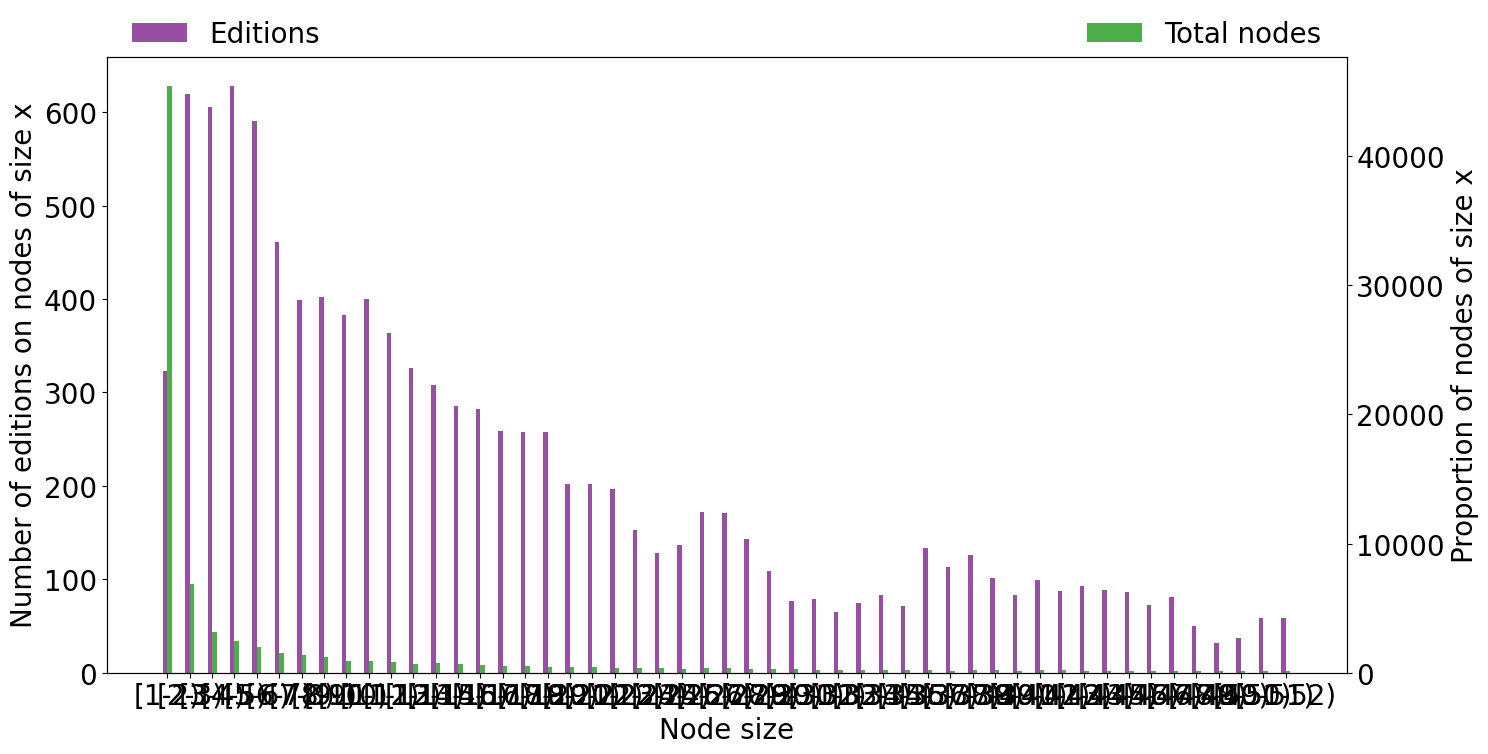

In [25]:
# Mêmes données mais normalisées par le nombre de noeuds de chaque taille de classe
node_sizes_counts_total:dict[str,int] = {node_class:0 for node_class in node_class_sizes}

for node,size in graph_A_node_sizes.items():
    for node_class in node_class_sizes:
        if node_class[0] <= size <= node_class[1]:
            node_sizes_counts_total[node_class] += 1

for node,size in graph_B_node_sizes.items():
    for node_class in node_class_sizes:
        if node_class[0] <= size <= node_class[1]:
            node_sizes_counts_total[node_class] += 1
            
x = arange(len(node_class_sizes))
width=0.20
multiplier = 0

fig, ax = plt.subplots(figsize=(16,8))
ax.set_xlabel('Node size')
ax.set_ylabel('Number of editions on nodes of size x')
axb = ax.twinx()
axb.set_ylabel('Proportion of nodes of size x')

edition_classes_counts:dict[str,int] = {node_class:0 for node_class in node_class_sizes}
node_sizes_counts:dict[str,int] = {node_class:0 for node_class in node_class_sizes}

for node_size in lengths_nodes_edit:
    for node_class in node_class_sizes:
        if node_class[0] <= node_size <= node_class[1]:
            edition_classes_counts[node_class] += 1
            
for node in all_edited_nodes_B:
    for node_class in node_class_sizes:
        if node_class[0] <= pggb_gfa.segments[node]['length'] <= node_class[1]:
            node_sizes_counts[node_class] += 1
            
for node in all_edited_nodes_A:
    for node_class in node_class_sizes:
        if node_class[0] <= cactus_gfa.segments[node]['length'] <= node_class[1]:
            node_sizes_counts[node_class] += 1

ax.set_xticks(x+width/2,[f'[{node_class[0]}-{node_class[1]})' for node_class in node_class_sizes])
# [f'[{node_class[0]}-{node_class[1]})' for node_class in node_class_sizes]
ax.bar(x, [edition_classes_counts[node_class] for node_class in node_class_sizes], color=colors['purple'], width=width)
ax.legend(['Editions'],loc='upper left',frameon=False,bbox_to_anchor=(0, 1.1))
#axb.bar(x+width, [node_sizes_counts[node_class] for node_class in node_class_sizes], color=colors['orange'], width=width)
axb.bar(x+width, [node_sizes_counts_total[node_class] for node_class in node_class_sizes], color=colors['green'], width=width)
axb.legend(['Total nodes'],loc='upper right',frameon=False,bbox_to_anchor=(1, 1.1))
plt.show()

In [26]:
total_length = sum(graph_A_node_sizes.values()) + sum(graph_B_node_sizes.values())
total_edited_length = (sum([graph_A_node_sizes[node] for node in all_edited_nodes_A]) + sum([graph_B_node_sizes[node] for node in all_edited_nodes_B]))*2

edited_nodes_ratio = total_edited_length/total_length

ratio_per_base_edit = len(edition_sizes) / total_edited_length
ratio_per_base_graph = len(edition_sizes) / total_length


print(f'Total node count: {len(graph_A_node_sizes) + len(graph_B_node_sizes)}')
print(f'Total edited node count: {len(all_edited_nodes_A) + len(all_edited_nodes_B)}')
print(f'Average edition count per edited node: {len(edition_sizes)/(len(all_edited_nodes_A) + len(all_edited_nodes_B))}')
print(f'Average edition count per node: {len(edition_sizes)/(len(graph_A_node_sizes) + len(graph_B_node_sizes))}')
print(f'Ratio of edited node count: {(len(all_edited_nodes_A) + len(all_edited_nodes_B))/(len(graph_A_node_sizes) + len(graph_B_node_sizes))}')

print(f'Total length of the graphs: {total_length}')
print(f'Total length of the edited nodes: {total_edited_length}')
print(f'Edition count: {len(edition_sizes)}')
print(f'Ratio of edited nodes: {edited_nodes_ratio}')
print(f'Ratio of editions per base in the edited nodes: {ratio_per_base_edit}')
print(f'Ratio of editions per base in the graphs: {ratio_per_base_graph}')

Total node count: 62102
Total edited node count: 2365
Average edition count per edited node: 2.6630021141649047
Average edition count per node: 0.10141380309812889
Ratio of edited node count: 0.03808250941998648
Total length of the graphs: 736223
Total length of the edited nodes: 93790
Edition count: 6298
Ratio of edited nodes: 0.12739346638178922
Ratio of editions per base in the edited nodes: 0.06715001599317624
Ratio of editions per base in the graphs: 0.008554473304963306


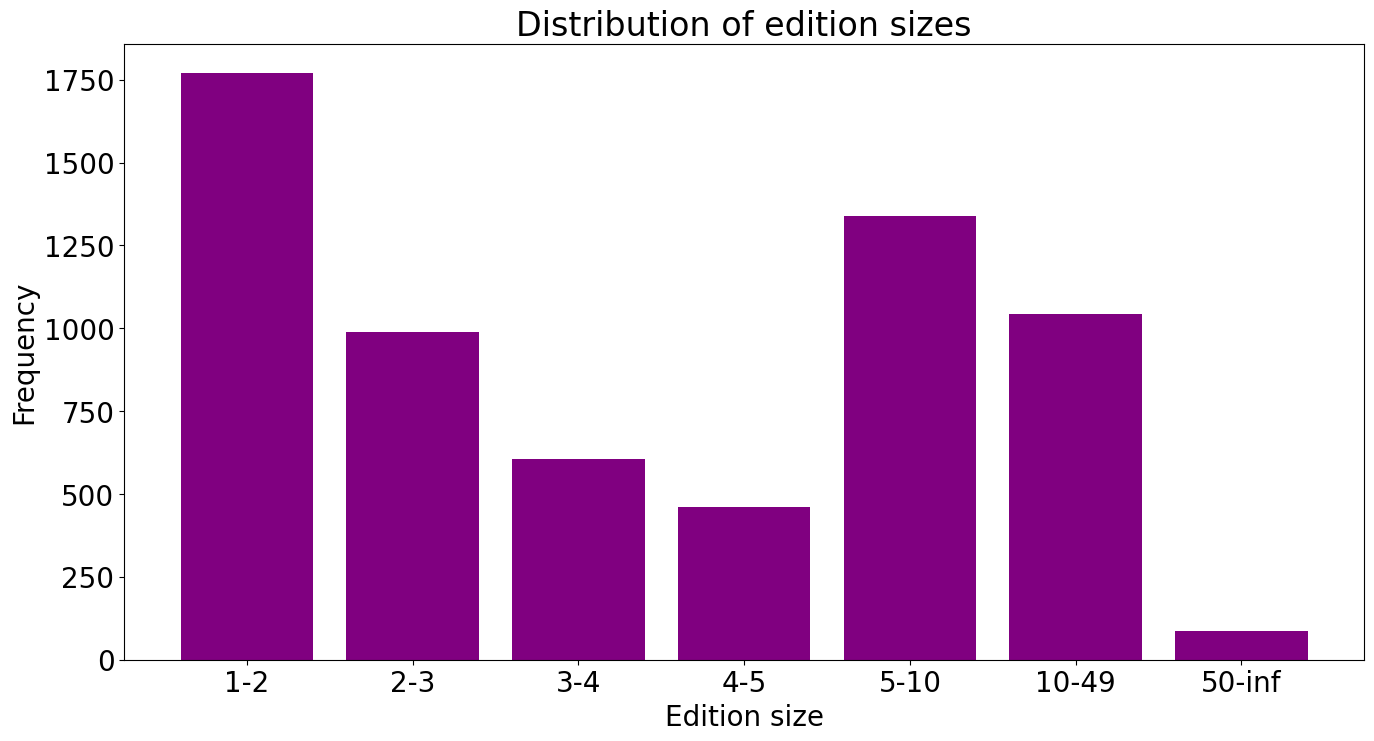

6298


In [27]:
node_class_sizes = [(1,2),(2,3),(3,4),(4,5),(5,10),(10,49),(50,float('inf'))]

# Barplot of edition sizes
# We plot the distribution of edition sizes
# We compute the mean and the standard deviation
fig, ax = plt.subplots(figsize=(16,8))
ax.set_xlabel('Edition size')
ax.set_ylabel('Frequency')
ax.set_title('Distribution of edition sizes')
counts:Counter = Counter(edition_sizes)
# Group bars per size class
for i,(min_size,max_size) in enumerate(node_class_sizes):
    ax.bar([f'{min_size}-{max_size}'],sum([v for k,v in counts.items() if min_size <= k < max_size]),color='purple',label=f'{min_size}-{max_size}')
#ax.axvline(mean(edition_sizes),color='red',label='Mean')
#ax.axvline(median(edition_sizes),color='green',label='Median')
#ax.legend()
plt.show()

counts

print(sum([v for k,v in counts.items()]))


In [28]:
counts_percentage:Counter = Counter(percentage_edition_size)

print(counts_percentage)

Counter({0.5: 590, 0.3333333333333333: 574, 0.25: 327, 0.4: 257, 0.2: 237, 0.16666666666666666: 165, 0.14285714285714285: 116, 0.2857142857142857: 112, 0.125: 110, 0.42857142857142855: 89, 0.375: 89, 0.2222222222222222: 85, 0.1111111111111111: 79, 0.1: 79, 0.4444444444444444: 71, 0.09090909090909091: 67, 0.45454545454545453: 66, 0.2727272727272727: 55, 0.18181818181818182: 53, 0.3: 52, 0.36363636363636365: 46, 0.08333333333333333: 42, 0.07692307692307693: 41, 0.4166666666666667: 40, 0.46153846153846156: 40, 0.15384615384615385: 38, 0.13333333333333333: 37, 0.07142857142857142: 35, 0.23076923076923078: 35, 0.06666666666666667: 34, 0.3076923076923077: 33, 0.0625: 32, 0.38461538461538464: 31, 0.05555555555555555: 30, 0.21428571428571427: 29, 0.058823529411764705: 27, 0.4666666666666667: 26, 0.05263157894736842: 26, 0.35714285714285715: 24, 0.2777777777777778: 24, 0.10526315789473684: 23, 0.35294117647058826: 23, 0.3888888888888889: 22, 0.29411764705882354: 21, 0.3684210526315789: 21, 0.23

In [29]:
# Calcul des classes de taille de noeuds
node_A_class_sizes: list[int] = [0 for _ in node_class_sizes] # nb de noeuds
node_A_class_lengths: list[int] = [0 for _ in node_class_sizes] # nb de noeuds * taille des noeuds
# On trie les noeuds par classe de taille
# On travaille ici au niveau du graphe, on ne compte pas en fonction des chemins
for node_size in graph_A_node_sizes.values():
    for i,(lower_bound,upper_bound) in enumerate(node_class_sizes):
        if node_size >= lower_bound and node_size <= upper_bound:
            node_A_class_sizes[i] += 1
            node_A_class_lengths[i] += node_size
            
node_B_class_sizes: list[int] = [0 for _ in node_class_sizes] # nb de noeuds
node_B_class_lengths: list[int] = [0 for _ in node_class_sizes] # nb de noeuds * taille des noeuds
# Même chose pour le second graphe
for node_size in graph_B_node_sizes.values():
    for i,(lower_bound,upper_bound) in enumerate(node_class_sizes):
        if node_size >= lower_bound and node_size <= upper_bound:
            node_B_class_sizes[i] += 1
            node_B_class_lengths[i] += node_size

In [30]:
# Noeuds impliqués dans des éditions

nodes_A_in_editions:set[str] = set()
nodes_B_in_editions:set[str] = set()

# On itère sur toutes les éditions
for path_name,edition_profile in editions.items():
    for position,[node_A,node_B] in edition_profile['merges'] + edition_profile['splits']:
        nodes_A_in_editions.add(node_A)
        nodes_B_in_editions.add(node_B)
        
        
node_A_edited_sizes: list[int] = [0 for _ in node_class_sizes] # compte des noeuds
node_A_edited_lengths: list[int] = [0 for _ in node_class_sizes] # compte des noeuds * taille des noeuds
# On trie les noeuds par classe de taille
# On travaille ici au niveau du graphe, on ne compte pas en fonction des chemins
for node_name in nodes_A_in_editions:
    node_size:int = graph_A_node_sizes[node_name]
    for i,(lower_bound,upper_bound) in enumerate(node_class_sizes):
        if node_size >= lower_bound and node_size <= upper_bound:
            node_A_edited_sizes[i] += 1
            node_A_edited_lengths[i] += node_size
            
node_B_edited_sizes: list[int] = [0 for _ in node_class_sizes]
node_B_edited_lengths: list[int] = [0 for _ in node_class_sizes]
# Même chose pour le second graphe
for node_name in nodes_B_in_editions:
    node_size:int = graph_B_node_sizes[node_name]
    for i,(lower_bound,upper_bound) in enumerate(node_class_sizes):
        if node_size >= lower_bound and node_size <= upper_bound:
            node_B_edited_sizes[i] += 1
            node_B_edited_lengths[i] += node_size

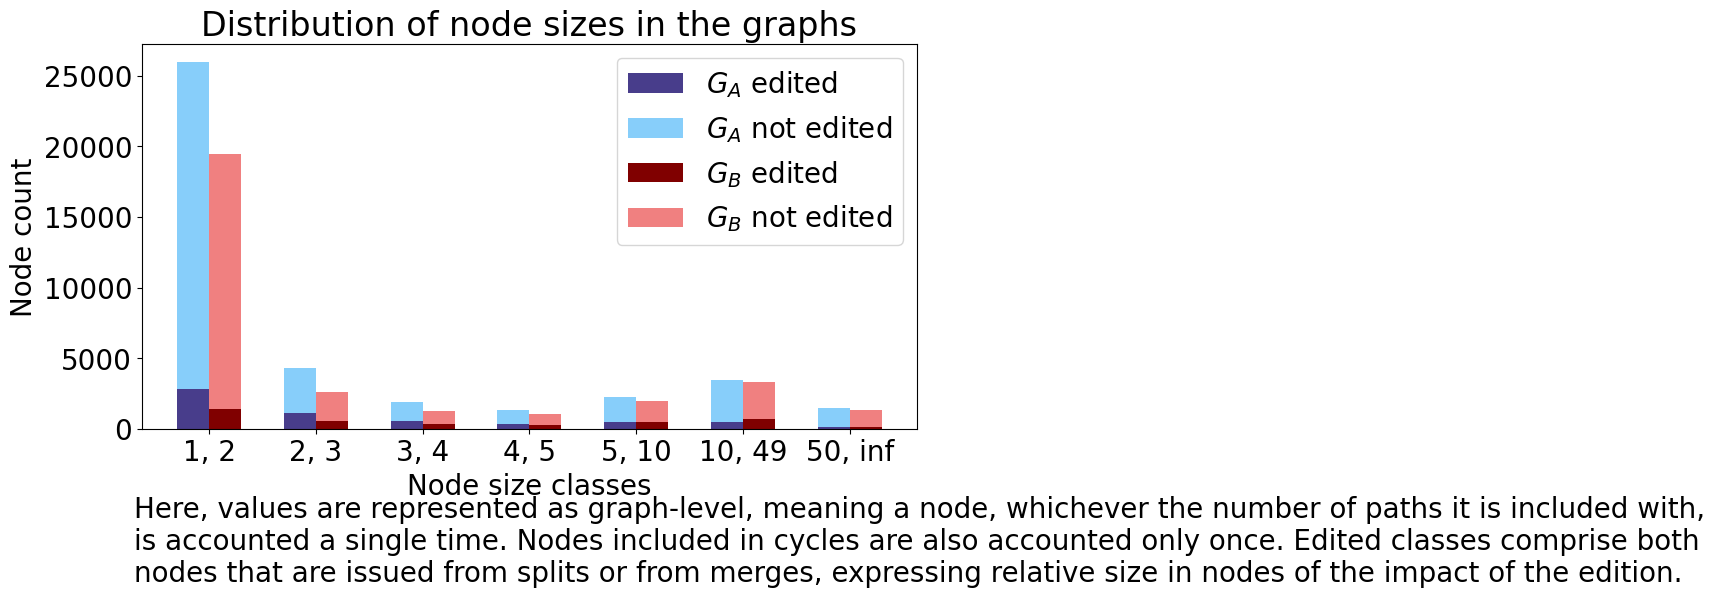

In [31]:
# Affichage des classes de noeuds

# Position of bars on x-axis
ind = arange(len(node_class_sizes))

# Figure size
plt.figure(figsize=(10,5))

# Width of a bar 
width = 0.3       

# Plotting
plt.bar(ind, node_A_edited_sizes, width, label='$G_A$ edited',color='darkslateblue',)
plt.bar(ind, [x-node_A_edited_sizes[i] for i,x in enumerate(node_A_class_sizes)], width, label='$G_A$ not edited',color='lightskyblue', bottom=node_A_edited_sizes)
plt.bar(ind + width, node_B_edited_sizes, width, label='$G_B$ edited',color='maroon')
plt.bar(ind + width, [x-node_B_edited_sizes[i] for i,x in enumerate(node_B_class_sizes)], width, label='$G_B$ not edited',bottom=node_B_edited_sizes,color='lightcoral')

plt.xlabel('Node size classes')
plt.ylabel('Node count')
plt.title('Distribution of node sizes in the graphs')

# xticks()
# First argument - A list of positions at which ticks should be placed
# Second argument -  A list of labels to place at the given locations
plt.xticks(ind + width / 2, [str(x)[1:-1] for x in node_class_sizes])

# Finding the best position for legends and putting it
plt.legend(loc='best')
plt.annotate(
"""Here, values are represented as graph-level, meaning a node, whichever the number of paths it is included with,
is accounted a single time. Nodes included in cycles are also accounted only once. Edited classes comprise both
nodes that are issued from splits or from merges, expressing relative size in nodes of the impact of the edition.""", (-0.01,-0.1), (0, -20), xycoords='axes fraction', textcoords='offset points', va='top')

#plt.savefig("figures/distribution_node_sizes.png", bbox_inches='tight')
plt.show()

On peut également montrer la proportion de séquence impactée par ces éditions, en collapsant les classes mais en multipliant le noeud par sa taille, pour avoir le poids relatif de l'édition sur le graphe (= combien de bases sont dans des zones mésappareillées)

FileNotFoundError: [Errno 2] No such file or directory: '/home/sidubois/Workspace/pancat_paper/4_reproduce_figures/figures/distribution_node_lengths.png'

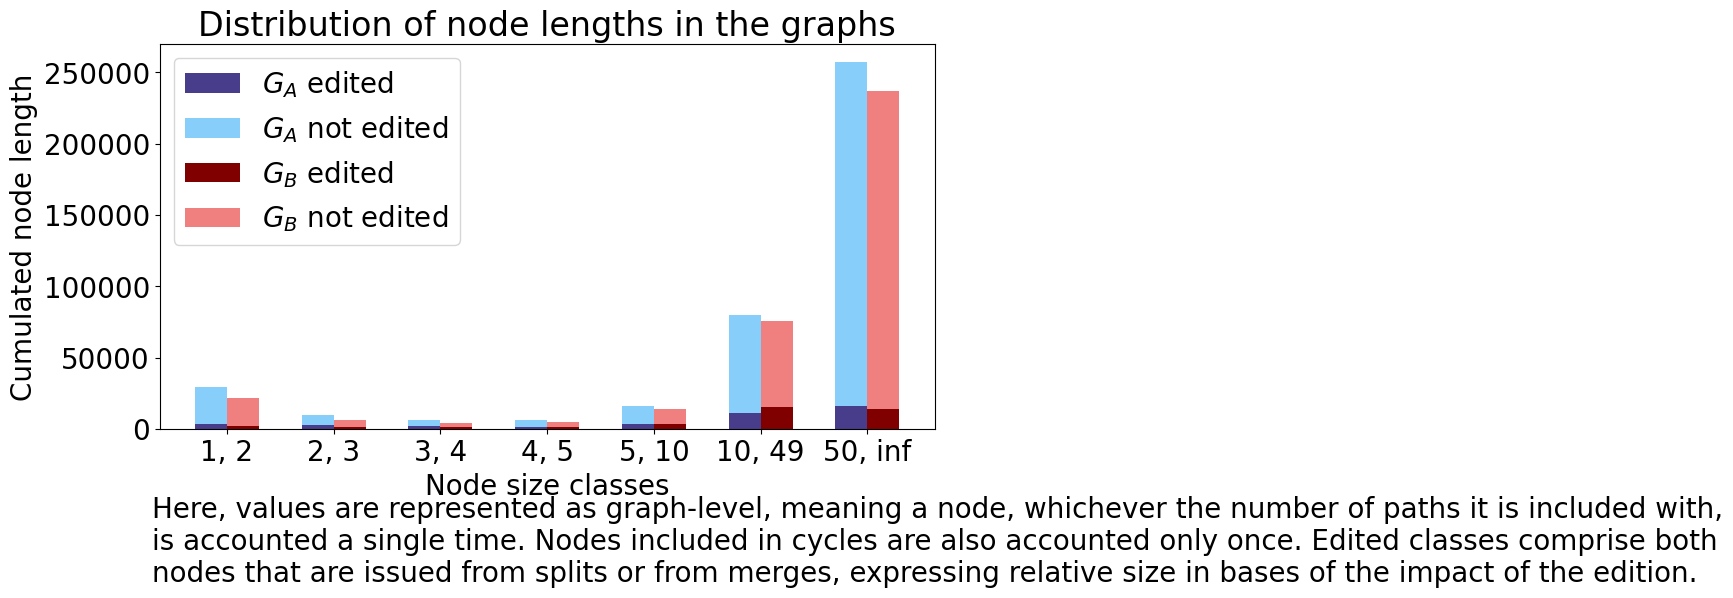

In [32]:
# Affichage des classes de noeuds

# Position of bars on x-axis
ind = arange(len(node_class_sizes))

# Figure size
plt.figure(figsize=(10,5))

# Width of a bar 
width = 0.3       

# Plotting
plt.bar(ind, node_A_edited_lengths, width, label='$G_A$ edited',color='darkslateblue',)
plt.bar(ind, [x-node_A_edited_lengths[i] for i,x in enumerate(node_A_class_lengths)], width, label='$G_A$ not edited',color='lightskyblue', bottom=node_A_edited_lengths)
plt.bar(ind + width, node_B_edited_lengths, width, label='$G_B$ edited',color='maroon')
plt.bar(ind + width, [x-node_B_edited_lengths[i] for i,x in enumerate(node_B_class_lengths)], width, label='$G_B$ not edited',bottom=node_B_edited_lengths,color='lightcoral')

plt.xlabel('Node size classes')
plt.ylabel('Cumulated node length')
plt.title('Distribution of node lengths in the graphs')

# xticks()
# First argument - A list of positions at which ticks should be placed
# Second argument -  A list of labels to place at the given locations
plt.xticks(ind + width / 2, [str(x)[1:-1] for x in node_class_sizes])

# Finding the best position for legends and putting it
plt.legend(loc='best')
plt.annotate(
"""Here, values are represented as graph-level, meaning a node, whichever the number of paths it is included with,
is accounted a single time. Nodes included in cycles are also accounted only once. Edited classes comprise both
nodes that are issued from splits or from merges, expressing relative size in bases of the impact of the edition.""", (-0.01,-0.1), (0, -20), xycoords='axes fraction', textcoords='offset points', va='top')
plt.savefig("figures/distribution_node_lengths.png", bbox_inches='tight')
plt.show()

# Extraction d'informations à partir des éditions

Notre fichier est formaté comme suit :

`
{
    path: {
        merges: [
            pos,
            [
                node
            ],
            ...
        ],
        splits: [
            pos,
            [
                node
            ],
            ...
        ]
    }
}
`

## Mesure de la taille des opérations

Dans cette partie, on va se concentrer sur la taille des évènements (le nombre de bases qu'ils concernent)

Cela peut être calculé de différentes manières :

### A1) Distance minimale sans prise en compte des sous-découpes
+ Pour les splits, distance minimale entre bordure gauche et bordure droite par rapport au split
+ Pour les merges, la même chose mais du point de vue de l'autre graphe

In [ ]:
# Calcul des valeurs de distance minimale
deltas_before:list[int] = list()
treated_nodes:set[tuple] = set()
for path_name,edition_profile in editions.items():
    for edit_type in ['merges','splits']:
        for position,[node_A,node_B] in edition_profile[edit_type]:
            if (node_A,node_B) not in treated_nodes:
                # Merges are read on the first graph, whereas splits are on the second
                if edit_type == 'merges':
                    for ofs_start,ofs_end,_ in cactus_gfa.segments[node_A]['PO'][path_name]:
                        if position >= ofs_start and position <= ofs_end:
                            deltas_before.append(min(abs(ofs_end-position),abs(position-ofs_start)))
                else:
                    for ofs_start,ofs_end,_ in pggb_gfa.segments[node_B]['PO'][path_name]:
                        if position >= ofs_start and position <= ofs_end:
                            deltas_before.append(min(abs(ofs_end-position),abs(position-ofs_start)))
                treated_nodes.add((node_A,node_B))

node_deltas_sizes_before: list[int] = [0 for _ in node_class_sizes]
node_deltas_lengths_before: list[int] = [0 for _ in node_class_sizes]

del treated_nodes
for delt in deltas_before:
    for i,(lower_bound,upper_bound) in enumerate(node_class_sizes):
        if delt >= lower_bound and delt <= upper_bound:
            node_deltas_sizes_before[i] += 1
            node_deltas_lengths_before[i] += delt

Le problème de cette méthode de calcul est qu'on ne prend pas en compte les multiples découpes pour un noeud. Cela donne juste l'information du sur-découpage des noeuds.

### A2) Distance minimale avec prise en compte des sous-découpes
+ Pour les splits, distance minimale entre bordure gauche et bordure droite par rapport au split
+ Pour les merges, la même chose mais du point de vue de l'autre graphe

Dans cette méthode, on a l'information de comment chaque édition interagit avec les autres. On recherche le plus proche breakpoint existant, qu'il soit réel ou fictif.

In [ ]:
# Calcul des valeurs de distance minimale
deltas:list[int] = list()
treated_nodes:set[tuple] = set()
for path_name,edition_profile in editions.items():
    for edit_type in ['merges','splits']:
        for position,[node_A,node_B] in edition_profile[edit_type]:
            if (node_A,node_B) not in treated_nodes:
                # Merges are read on the first graph, whereas splits are on the second
                if edit_type == 'merges':
                    for ofs_start,ofs_end,_ in cactus_gfa.segments[node_A]['PO'][path_name]:
                        if position >= ofs_start and position <= ofs_end:
                            closest_event:list[int] = [abs(position-p) for p,_ in edition_profile['merges'] if p >= ofs_start and p <= ofs_end and p != position]
                            if len(closest_event) == 0:
                                event:int = float('inf')
                            else:
                                event:int = min(closest_event)
                            deltas.append(min(abs(ofs_end-position),abs(position-ofs_start),event))
                else:
                    for ofs_start,ofs_end,_ in pggb_gfa.segments[node_B]['PO'][path_name]:
                        if position >= ofs_start and position <= ofs_end:
                            closest_event:list[int] = [abs(position-p) for p,_ in edition_profile['splits'] if p >= ofs_start and p <= ofs_end and p != position]
                            if len(closest_event) == 0:
                                event:int = float('inf')
                            else:
                                event:int = min(closest_event)
                            deltas.append(min(abs(ofs_end-position),abs(position-ofs_start),event))
                treated_nodes.add((node_A,node_B))


node_deltas_sizes: list[int] = [0 for _ in node_class_sizes]
node_deltas_lengths: list[int] = [0 for _ in node_class_sizes]

del treated_nodes
for delt in deltas:
    for i,(lower_bound,upper_bound) in enumerate(node_class_sizes):
        if delt >= lower_bound and delt <= upper_bound:
            node_deltas_sizes[i] += 1
            node_deltas_lengths[i] += delt

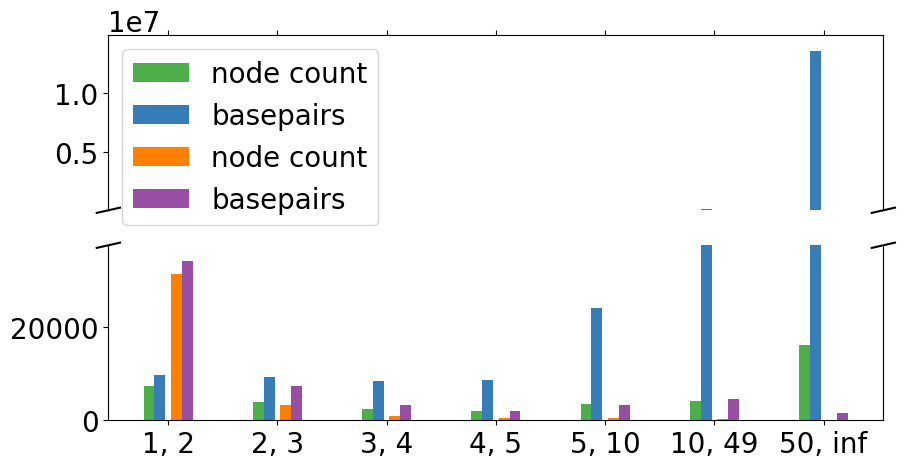

In [ ]:
# Affichage des résultats de la distance minimale
plt.rcParams.update({'font.size': 20})
ind = arange(len(node_class_sizes))

f, (ax, ax2) = plt.subplots(2, 1, sharex=True,figsize=(10,5))

maximum_values:list[int] = sorted(node_deltas_sizes_before + node_deltas_lengths_before + node_deltas_sizes + node_deltas_lengths)

width = .1

cb_colors:dict[str,str] = {
    'blue':    '#377eb8', 
    'orange':  '#ff7f00',
    'green':   '#4daf4a',
    'pink':    '#f781bf',
    'brown':   '#a65628',
    'purple':  '#984ea3',
    'gray':    '#999999',
    'red':     '#e41a1c',
    'yellow':  '#dede00'
} 


# plot the same data on both axes
ax.bar(ind - 1.25*width, node_deltas_sizes_before, width, label='node count',color=cb_colors['green'],)
ax.bar(ind - .25 *width, node_deltas_lengths_before, width, label='basepairs',color=cb_colors['blue'],)
ax.bar(ind + 1.25*width, node_deltas_sizes, width, label='node count',color=cb_colors['orange'],)
ax.bar(ind + 2.25*width, node_deltas_lengths, width, label='basepairs',color=cb_colors['purple'],)
ax2.bar(ind - 1.25*width, node_deltas_sizes_before, width, label='node count',color=cb_colors['green'],)
ax2.bar(ind - .25 *width, node_deltas_lengths_before, width, label='basepairs',color=cb_colors['blue'],)
ax2.bar(ind + 1.25*width, node_deltas_sizes, width, label='node count',color=cb_colors['orange'],)
ax2.bar(ind + 2.25*width, node_deltas_lengths, width, label='basepairs',color=cb_colors['purple'],)


# zoom-in / limit the view to different portions of the data
ax.set_ylim(maximum_values[-3]*.8, maximum_values[-1]*1.10)  # outliers only
ax2.set_ylim(0, maximum_values[-3]*1.10)  # most of the data

# hide the spines between ax and ax2
ax.spines['bottom'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax.xaxis.tick_top()
ax.tick_params(labeltop=False)  # don't put tick labels at the top
ax.set_xticks(ind + width / 2, [str(x)[1:-1] for x in node_class_sizes])
ax2.xaxis.tick_bottom()

d = .015 
kwargs = dict(transform=ax.transAxes, color='k', clip_on=False)
ax.plot((-d, +d), (-d, +d), **kwargs)        # top-left diagonal
ax.plot((1 - d, 1 + d), (-d, +d), **kwargs)  # top-right diagonal

kwargs.update(transform=ax2.transAxes)  # switch to the bottom axes
ax2.plot((-d, +d), (1 - d, 1 + d), **kwargs)  # bottom-left diagonal
ax2.plot((1 - d, 1 + d), (1 - d, 1 + d), **kwargs)  # bottom-right diagonal

ax.legend(loc='upper left')

plt.savefig("figures/minimum_distance_breakpoint.png", bbox_inches='tight')
plt.show()

### B) Densité des opérations
+ Nombre moyen d'opérations par noeud
    - pour les splits, nombre de découpes dans un noeud
    - pour les merges, nombre de merges pour obtenir un noeud

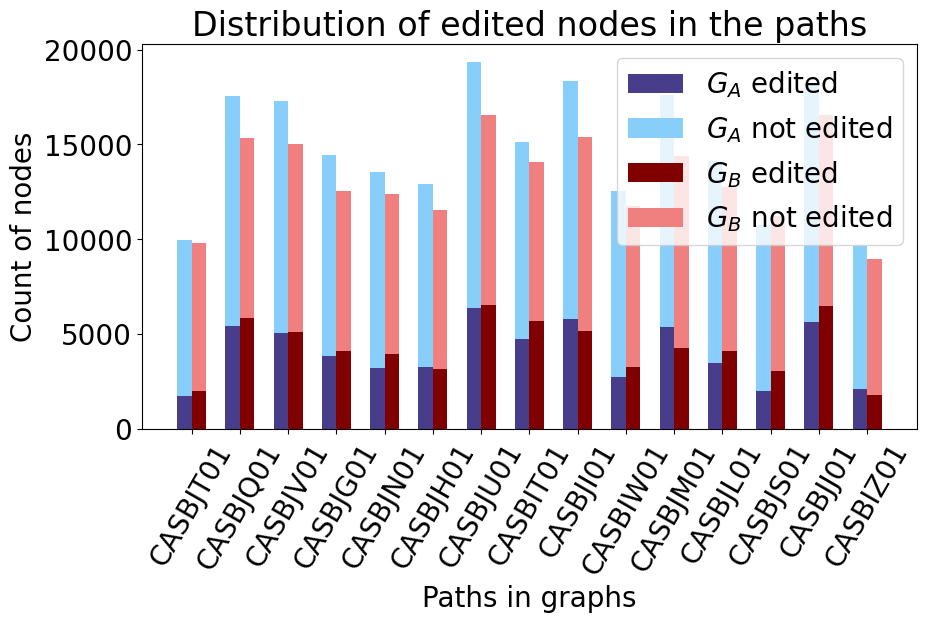

In [ ]:
# Noeuds dans les éditions

# Affichage des classes de noeuds
graph_paths:list = list(set(cactus_gfa.paths.keys()).union(set(pggb_gfa.paths.keys())))
# Position of bars on x-axis
ind = arange(len(graph_paths))

raw_path_nodes_graph_A:list[int] = [0 for _ in graph_paths] # nombre total de noeuds dans chaque chemin
raw_path_nodes_graph_B:list[int] = [0 for _ in graph_paths] # nombre total de noeuds dans chaque chemin
edited_path_nodes_graph_A:list[int] = [0 for _ in graph_paths]
edited_path_nodes_graph_B:list[int] = [0 for _ in graph_paths]

for i,path_name in enumerate(graph_paths):
    if path_name in cactus_gfa.paths.keys():
        raw_path_nodes_graph_A[i] = len(set([x for x,_ in cactus_gfa.paths[path_name]['path']])-nodes_A_in_editions)
        edited_path_nodes_graph_A[i] = len(set([x for x,_ in cactus_gfa.paths[path_name]['path']]).intersection(nodes_A_in_editions))
    if path_name in pggb_gfa.paths.keys():
        raw_path_nodes_graph_B[i] = len(set([x for x,_ in pggb_gfa.paths[path_name]['path']])-nodes_B_in_editions)
        edited_path_nodes_graph_B[i] = len(set([x for x,_ in pggb_gfa.paths[path_name]['path']]).intersection(nodes_B_in_editions))

# Figure size
plt.figure(figsize=(10,5))

# Width of a bar 
width = 0.3       

# Plotting
plt.bar(ind, edited_path_nodes_graph_A, width, label='$G_A$ edited',color='darkslateblue',)
plt.bar(ind, raw_path_nodes_graph_A, width, label='$G_A$ not edited',color='lightskyblue', bottom=edited_path_nodes_graph_A)
plt.bar(ind + width, edited_path_nodes_graph_B, width, label='$G_B$ edited',color='maroon')
plt.bar(ind + width, raw_path_nodes_graph_B, width, label='$G_B$ not edited',bottom=edited_path_nodes_graph_B,color='lightcoral')

plt.xlabel('Paths in graphs')
plt.ylabel('Count of nodes')
plt.title('Distribution of edited nodes in the paths')

# xticks()
# First argument - A list of positions at which ticks should be placed
# Second argument -  A list of labels to place at the given locations
plt.xticks(ind + width / 2, graph_paths,rotation=60)

# Finding the best position for legends and putting it
plt.legend(loc='best')
plt.annotate(
"""""", (-0.01,-0.1), (0, -20), xycoords='axes fraction', textcoords='offset points', va='top')
plt.savefig("figures/distribution_edited_nodes_paths.png", bbox_inches='tight')
plt.show()

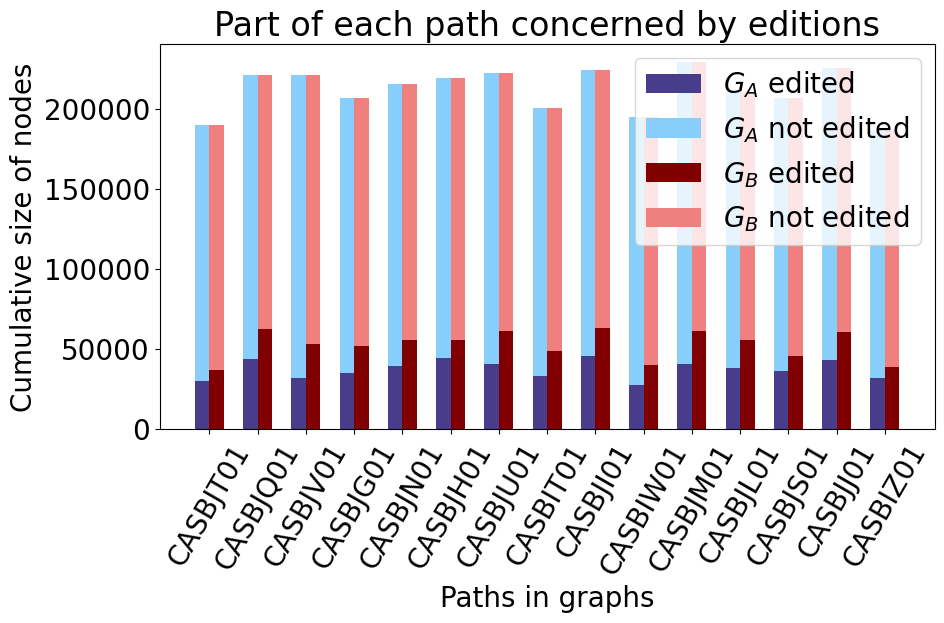

In [ ]:
# Taille des noeuds dans les chemins

# Affichage des classes de noeuds
graph_paths:list = list(set(cactus_gfa.paths.keys()).union(set(pggb_gfa.paths.keys())))
# Position of bars on x-axis
ind = arange(len(graph_paths))

raw_path_nodes_graph_A:list[int] = [0 for _ in graph_paths] # nombre total de noeuds dans chaque chemin
raw_path_nodes_graph_B:list[int] = [0 for _ in graph_paths] # nombre total de noeuds dans chaque chemin
edited_path_nodes_graph_A:list[int] = [0 for _ in graph_paths]
edited_path_nodes_graph_B:list[int] = [0 for _ in graph_paths]

for i,path_name in enumerate(graph_paths):
    raw_A = set([x for x,_ in cactus_gfa.paths[path_name]['path']])-nodes_A_in_editions
    raw_B = set([x for x,_ in pggb_gfa.paths[path_name]['path']])-nodes_B_in_editions
    if path_name in cactus_gfa.paths.keys():
        for node,_ in cactus_gfa.paths[path_name]['path']:
            if node in raw_A:
                raw_path_nodes_graph_A[i] += graph_A_node_sizes[node]
            else:
                edited_path_nodes_graph_A[i] += graph_A_node_sizes[node]
    if path_name in pggb_gfa.paths.keys():
        for node,_ in pggb_gfa.paths[path_name]['path']:
            if node in raw_B:
                raw_path_nodes_graph_B[i] += graph_B_node_sizes[node]
            else:
                edited_path_nodes_graph_B[i] += graph_B_node_sizes[node]

# Figure size
plt.figure(figsize=(10,5))

# Width of a bar 
width = 0.3       

# Plotting
plt.bar(ind, edited_path_nodes_graph_A, width, label='$G_A$ edited',color='darkslateblue',)
plt.bar(ind, raw_path_nodes_graph_A, width, label='$G_A$ not edited',color='lightskyblue', bottom=edited_path_nodes_graph_A)
plt.bar(ind + width, edited_path_nodes_graph_B, width, label='$G_B$ edited',color='maroon')
plt.bar(ind + width, raw_path_nodes_graph_B, width, label='$G_B$ not edited',bottom=edited_path_nodes_graph_B,color='lightcoral')

plt.xlabel('Paths in graphs')
plt.ylabel('Cumulative size of nodes')
plt.title('Part of each path concerned by editions')

# xticks()
# First argument - A list of positions at which ticks should be placed
# Second argument -  A list of labels to place at the given locations
plt.xticks(ind + width / 2, graph_paths,rotation=60)

# Finding the best position for legends and putting it
plt.legend(loc='best')
plt.annotate(
"""""", (-0.01,-0.1), (0, -20), xycoords='axes fraction', textcoords='offset points', va='top')
plt.savefig("figures/path_part_edition.png", bbox_inches='tight')
plt.show()

In [ ]:
# Calcul de densité 
def count_group(lst):
    consec = [1]
    for x, y in zip(lst, lst[1:]):
        if x == y:
            consec[-1] += 1
        else:
            consec.append(1)
    return consec

nodes_A_splits:dict[str,list] = dict() 
nodes_B_splits:dict[str,list] = dict() 
nodes_A_merges:dict[str,list] = dict()
nodes_B_merges:dict[str,list] = dict()
for path_name,edition_profile in editions.items():
    # On doit exprimer, pour chaque noeud que l'on projette, sur combien de noeuds il est projeté.
    nodes_A_splits[path_name] = [node_A for _,[node_A,_] in edition_profile['splits']]
    nodes_B_splits[path_name] = [node_B for _,[_,node_B] in edition_profile['splits']]
    nodes_A_merges[path_name] = [node_A for _,[node_A,_] in edition_profile['merges']]
    nodes_B_merges[path_name] = [node_B for _,[_,node_B] in edition_profile['merges']]


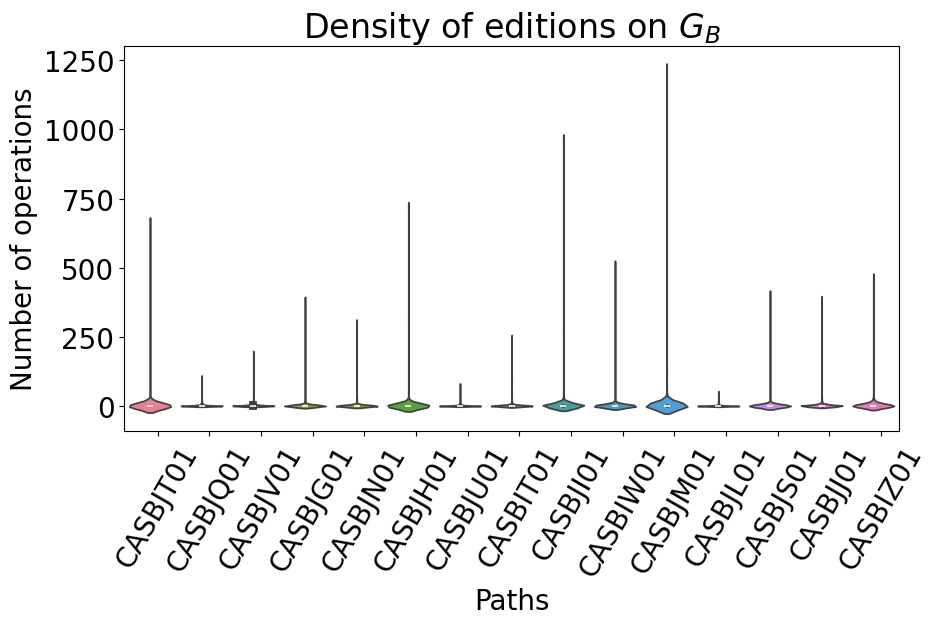

In [ ]:
# Affichage des densités
plt.figure(figsize=(10,5))
violinplot(data=[count_group(nodes_B_splits[path_name]) for path_name in graph_paths])
plt.title("Density of editions on $G_B$")
plt.xticks(ind + width / 2, graph_paths,rotation=60)
plt.xlabel("Paths")
plt.ylabel("Number of operations")
plt.savefig("figures/editions_density_B.png", bbox_inches='tight')

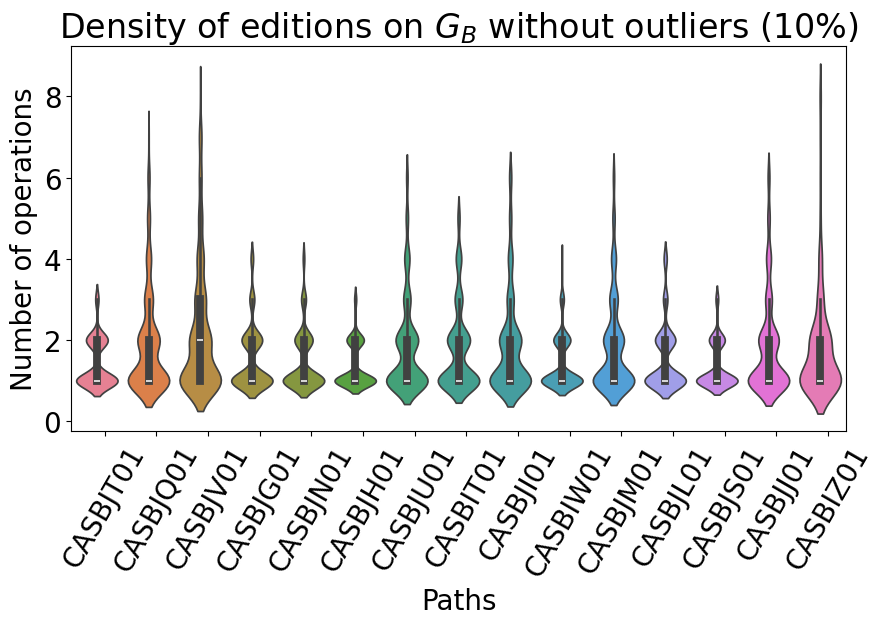

In [ ]:
# Without outliers
plt.figure(figsize=(10,5))
violinplot(data=[sorted(y := count_group(nodes_B_splits[path_name]))[:-int(len(y)*.1)] for path_name in graph_paths])
plt.title("Density of editions on $G_B$ without outliers (10%)")
plt.xticks(ind + width / 2, graph_paths,rotation=60)
plt.xlabel("Paths")
plt.ylabel("Number of operations")
plt.savefig("figures/editions_density_no_outliers_B.png", bbox_inches='tight')

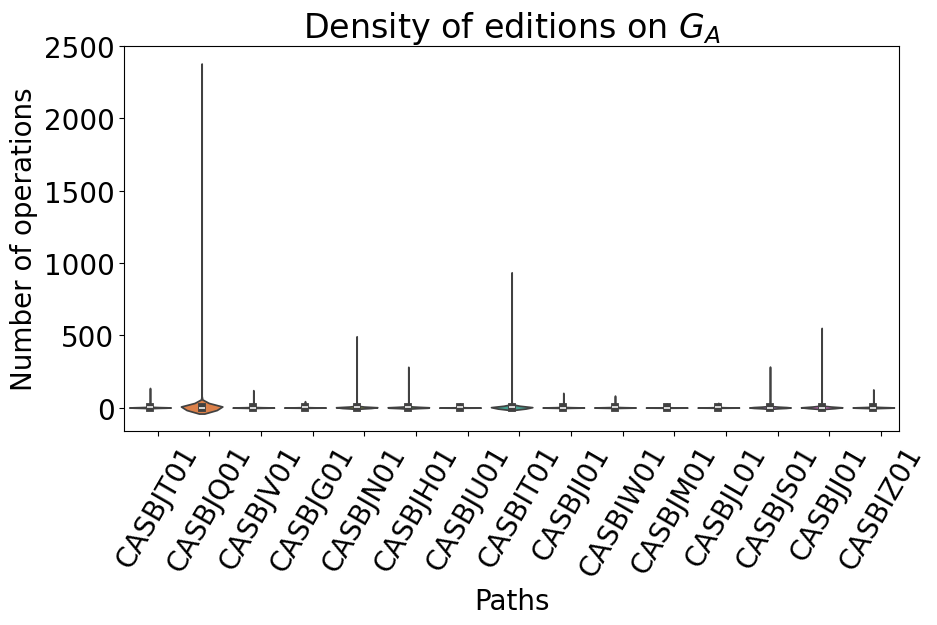

In [ ]:
plt.figure(figsize=(10,5))
violinplot(data=[count_group(nodes_A_merges[path_name]) for path_name in graph_paths])
plt.title("Density of editions on $G_A$")
plt.xticks(ind + width / 2, graph_paths,rotation=60)
plt.xlabel("Paths")
plt.ylabel("Number of operations")
plt.savefig("figures/editions_density_A.png", bbox_inches='tight')

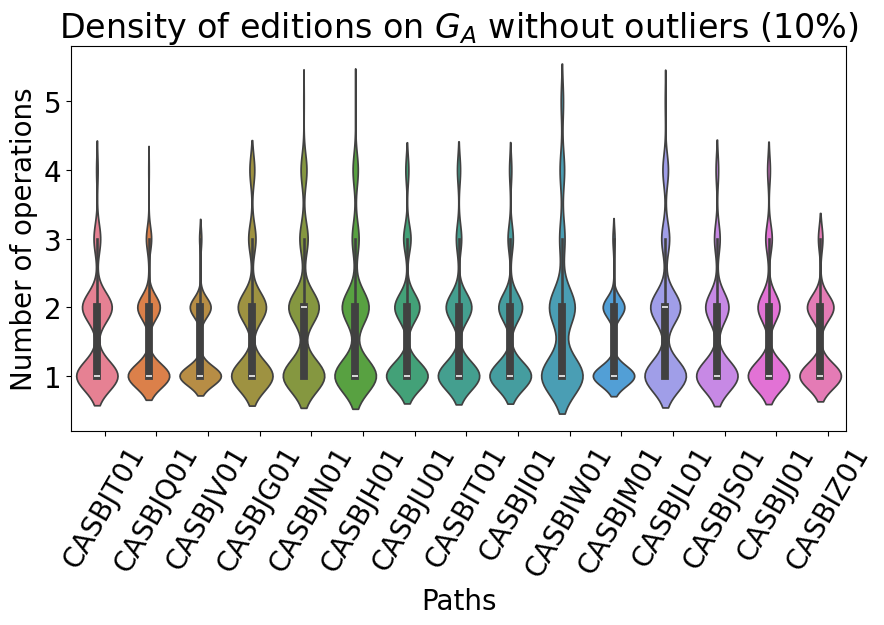

In [ ]:
# Without outliers
plt.figure(figsize=(10,5))
violinplot(data=[sorted(y := count_group(nodes_A_merges[path_name]))[:-int(len(y)*.1)] for path_name in graph_paths])
plt.title("Density of editions on $G_A$ without outliers (10%)")
plt.xticks(ind + width / 2, graph_paths,rotation=60)
plt.xlabel("Paths")
plt.ylabel("Number of operations")
plt.savefig("figures/editions_density_no_outliers_A.png", bbox_inches='tight')

Queele proportion d'éditions concerne 1 paire de bases ?

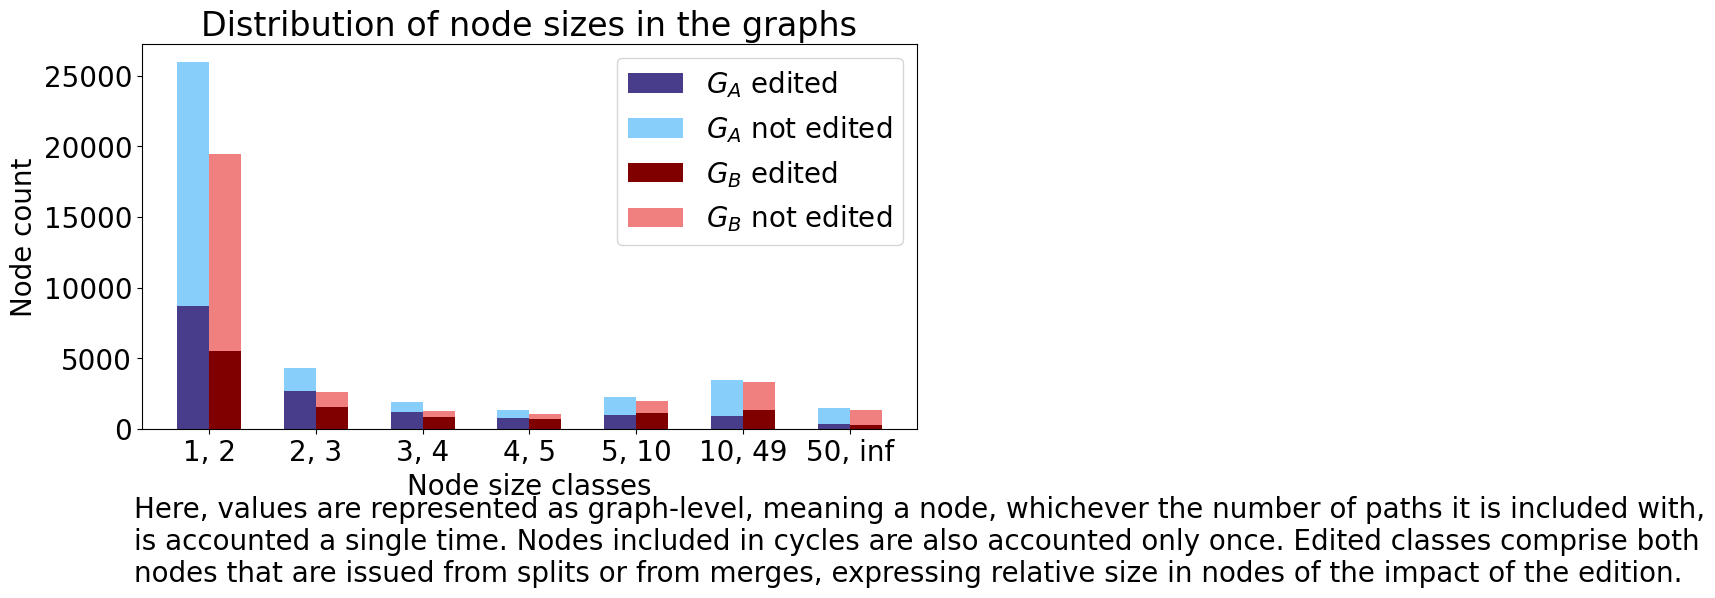

In [ ]:
# Affichage des classes de noeuds

# Position of bars on x-axis
ind = arange(len(node_class_sizes))

# Figure size
plt.figure(figsize=(10,5))

# Width of a bar 
width = 0.3       

# Plotting
plt.bar(ind, node_A_edited_sizes, width, label='$G_A$ edited',color='darkslateblue',)
plt.bar(ind, [x-node_A_edited_sizes[i] for i,x in enumerate(node_A_class_sizes)], width, label='$G_A$ not edited',color='lightskyblue', bottom=node_A_edited_sizes)
plt.bar(ind + width, node_B_edited_sizes, width, label='$G_B$ edited',color='maroon')
plt.bar(ind + width, [x-node_B_edited_sizes[i] for i,x in enumerate(node_B_class_sizes)], width, label='$G_B$ not edited',bottom=node_B_edited_sizes,color='lightcoral')

plt.xlabel('Node size classes')
plt.ylabel('Node count')
plt.title('Distribution of node sizes in the graphs')

# xticks()
# First argument - A list of positions at which ticks should be placed
# Second argument -  A list of labels to place at the given locations
plt.xticks(ind + width / 2, [str(x)[1:-1] for x in node_class_sizes])

# Finding the best position for legends and putting it
plt.legend(loc='best')
plt.annotate(
"""Here, values are represented as graph-level, meaning a node, whichever the number of paths it is included with,
is accounted a single time. Nodes included in cycles are also accounted only once. Edited classes comprise both
nodes that are issued from splits or from merges, expressing relative size in nodes of the impact of the edition.""", (-0.01,-0.1), (0, -20), xycoords='axes fraction', textcoords='offset points', va='top')
plt.show()

### D) Etablissement d'un score

Afin de définir un score que l'on va pouvoir utiliser par la suite, il doit retranscrire différentes mesures :
- la densité des éditions
- la taille des éditions
- le ratio noeuds édités/non édités

<BarContainer object of 318 artists>

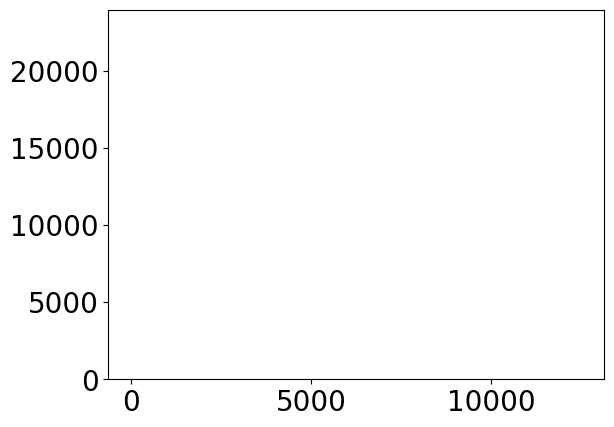

In [ ]:
len_nodes:list[int] = [node['length'] for node in cactus_gfa.segments.values()]
vals_len_nodes = sorted([(x,y) for x,y in Counter(len_nodes).items()],key=lambda x:int(x[0]))

plt.bar([x for x,_ in vals_len_nodes],[y for _,y in vals_len_nodes])


## E) Exploration des distances mash entre séquences

L'objectif ici est de voir si le manque/présence d'édition et le taux de long noeuds peut être corréllé avec la distance ; l'hypothèse étant que plus les séquences sont divergentes plus les noeuds sont grands.

In [ ]:
# Extract sequences and write them as files
sequences:dict = cactus_gfa.reconstruct_sequences()
for path_name,seq_generator in sequences.items():
    with open(f'temp/{path_name}.fa','w',encoding='utf-8') as fasta:
        fasta.write(f'>{path_name}\n'+''.join(list(seq_generator)))

In [ ]:
mash:list[list[float]] = [
    [
    0 for _ in range(len(graph_paths))
] for _ in range(len(graph_paths))
    ]

for i,path_name_A in enumerate(graph_paths):
    for j,path_name_B in enumerate(graph_paths):
        mash[i][j]=float(run(['mash', 'dist',f'temp/{path_name_A}.fa',f'temp/{path_name_B}.fa'], stdout=PIPE).stdout.decode('utf-8').split()[2])
        
mash

Sketching temp/CASBJT01.fa (provide sketch file made with "mash sketch" to skip)...done.
Sketching temp/CASBJT01.fa (provide sketch file made with "mash sketch" to skip)...done.
Sketching temp/CASBJT01.fa (provide sketch file made with "mash sketch" to skip)...done.
Sketching temp/CASBJT01.fa (provide sketch file made with "mash sketch" to skip)...done.
Sketching temp/CASBJT01.fa (provide sketch file made with "mash sketch" to skip)...done.
Sketching temp/CASBJT01.fa (provide sketch file made with "mash sketch" to skip)...done.
Sketching temp/CASBJT01.fa (provide sketch file made with "mash sketch" to skip)...done.
Sketching temp/CASBJT01.fa (provide sketch file made with "mash sketch" to skip)...done.
Sketching temp/CASBJT01.fa (provide sketch file made with "mash sketch" to skip)...done.
Sketching temp/CASBJT01.fa (provide sketch file made with "mash sketch" to skip)...done.
Sketching temp/CASBJT01.fa (provide sketch file made with "mash sketch" to skip)...done.
Sketching temp/CASBJT

[[0.0,
  0.0138985,
  0.0143537,
  0.0103986,
  0.0115761,
  0.0145076,
  0.0137986,
  0.0108702,
  0.0144049,
  0.0143537,
  0.017359,
  0.0126347,
  0.0148187,
  0.0149759,
  0.00744966],
 [0.0138985,
  0.0,
  0.00316966,
  0.00617965,
  0.0100623,
  0.0184352,
  0.00541137,
  0.00567497,
  0.0100207,
  0.0168391,
  0.0118927,
  0.0105688,
  0.0178312,
  0.00846101,
  0.0124],
 [0.0143537,
  0.00316966,
  0.0,
  0.00766986,
  0.0117564,
  0.0186813,
  0.00726808,
  0.00587519,
  0.0100623,
  0.0170111,
  0.0124935,
  0.011984,
  0.0181917,
  0.00956826,
  0.0127767],
 [0.0103986,
  0.00617965,
  0.00766986,
  0.0,
  0.00652391,
  0.0144562,
  0.00748619,
  0.00483188,
  0.0106545,
  0.0125875,
  0.015347,
  0.00694555,
  0.0143027,
  0.0110882,
  0.010441],
 [0.0115761,
  0.0100623,
  0.0117564,
  0.00652391,
  0.0,
  0.0130157,
  0.0097316,
  0.00888862,
  0.0129677,
  0.0125405,
  0.015347,
  0.00912584,
  0.0127293,
  0.0120298,
  0.0114865],
 [0.0145076,
  0.0184352,
  0.0186813,

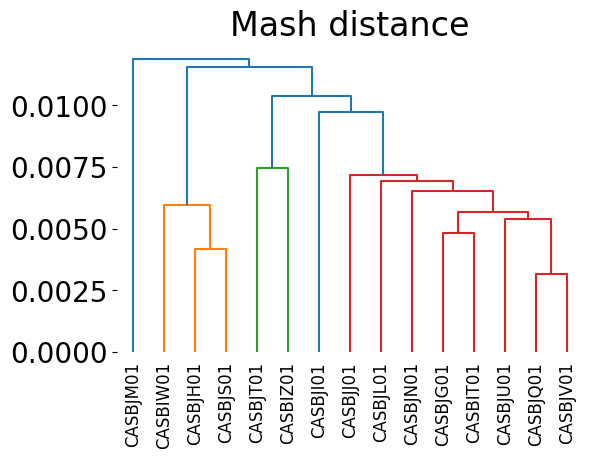

{'icoord': [[25.0, 25.0, 35.0, 35.0],
  [15.0, 15.0, 30.0, 30.0],
  [45.0, 45.0, 55.0, 55.0],
  [105.0, 105.0, 115.0, 115.0],
  [135.0, 135.0, 145.0, 145.0],
  [125.0, 125.0, 140.0, 140.0],
  [110.0, 110.0, 132.5, 132.5],
  [95.0, 95.0, 121.25, 121.25],
  [85.0, 85.0, 108.125, 108.125],
  [75.0, 75.0, 96.5625, 96.5625],
  [65.0, 65.0, 85.78125, 85.78125],
  [50.0, 50.0, 75.390625, 75.390625],
  [22.5, 22.5, 62.6953125, 62.6953125],
  [5.0, 5.0, 42.59765625, 42.59765625]],
 'dcoord': [[0.0, 0.00417861, 0.00417861, 0.0],
  [0.0, 0.00594242, 0.00594242, 0.00417861],
  [0.0, 0.00744966, 0.00744966, 0.0],
  [0.0, 0.00483188, 0.00483188, 0.0],
  [0.0, 0.00316966, 0.00316966, 0.0],
  [0.0, 0.00541137, 0.00541137, 0.00316966],
  [0.00483188, 0.00567497, 0.00567497, 0.00541137],
  [0.0, 0.00652391, 0.00652391, 0.00567497],
  [0.0, 0.00694555, 0.00694555, 0.00652391],
  [0.0, 0.00719593, 0.00719593, 0.00694555],
  [0.0, 0.0097316, 0.0097316, 0.00719593],
  [0.00744966, 0.0103986, 0.0103986, 0.00

In [ ]:
dists = squareform(mash)
linkage_matrix = linkage(dists, "single")
fig, ax = plt.subplots(figsize=(6,4))
color_list = dendrogram(linkage_matrix, labels=graph_paths)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
plt.xticks(rotation=90)
plt.title("Mash distance")
plt.savefig("figures/mash_tree.png", bbox_inches='tight')
plt.show()
color_list

### Calcul du taux de GC

In [ ]:
gc_level:dict[str,Counter] = dict()
sequences:dict = cactus_gfa.reconstruct_sequences()
for path_name,seq_generator in sequences.items():
    gc_level[path_name] = Counter(''.join(list(seq_generator)))
    
all_nucleotides:list[str] = list(set([key for counts in gc_level.values() for key in counts.keys()]))
all_nucleotides

['C', 'G', 'T', 'A', 'N']

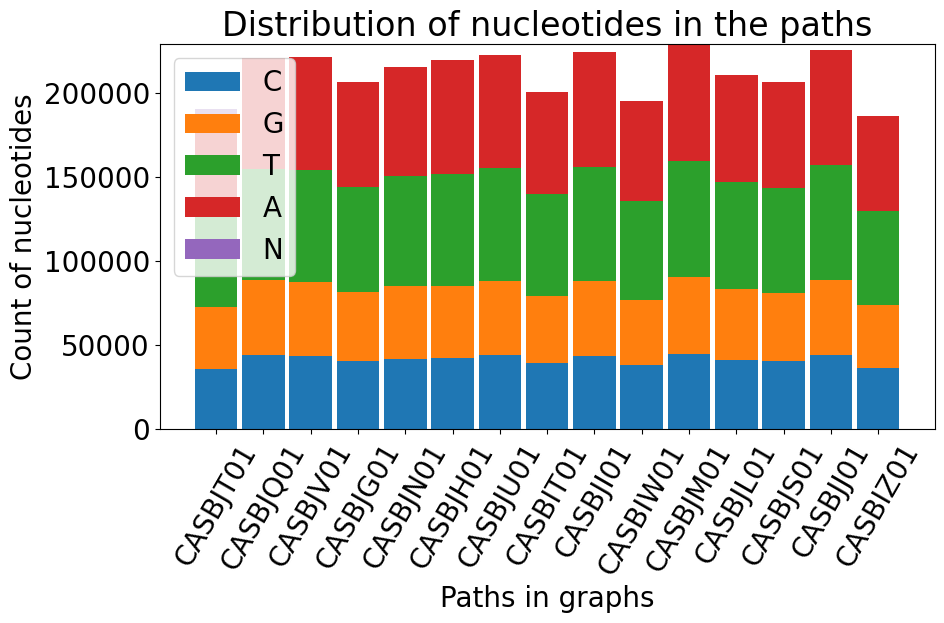

In [ ]:
# Figure size
plt.figure(figsize=(10,5))

# Width of a bar 
width = 0.9
ind = arange(len(graph_paths))

def sum_lists_diff_length(multilist:list,default:list=None):
    return ret_value if (ret_value := [sum(x) for x in zip(*map(lambda x: x + [0] * max(map(len, multilist)) if len(x) < max(map(len, multilist)) else x, multilist))]) else default


# Getting the tabs for each nucleotide
data_tables_content:list = [[gc_level[path_name].get(nucleotide,0) for path_name in graph_paths] for nucleotide in all_nucleotides]

# Plotting
for i,values in enumerate(data_tables_content):
    plt.bar(ind, values, width, label=all_nucleotides[i],bottom=sum_lists_diff_length(data_tables_content[0:i],default=[0 for _ in graph_paths]))

plt.xlabel('Paths in graphs')
plt.ylabel('Count of nucleotides')
plt.title('Distribution of nucleotides in the paths')

# xticks()
# First argument - A list of positions at which ticks should be placed
# Second argument -  A list of labels to place at the given locations
plt.xticks(ind, graph_paths,rotation=60)

# Finding the best position for legends and putting it
plt.legend(loc='best')
plt.annotate(
"""""", (-0.01,-0.1), (0, -20), xycoords='axes fraction', textcoords='offset points', va='top')
plt.savefig("figures/nucleotides_paths_raw.png", bbox_inches='tight')
plt.show()

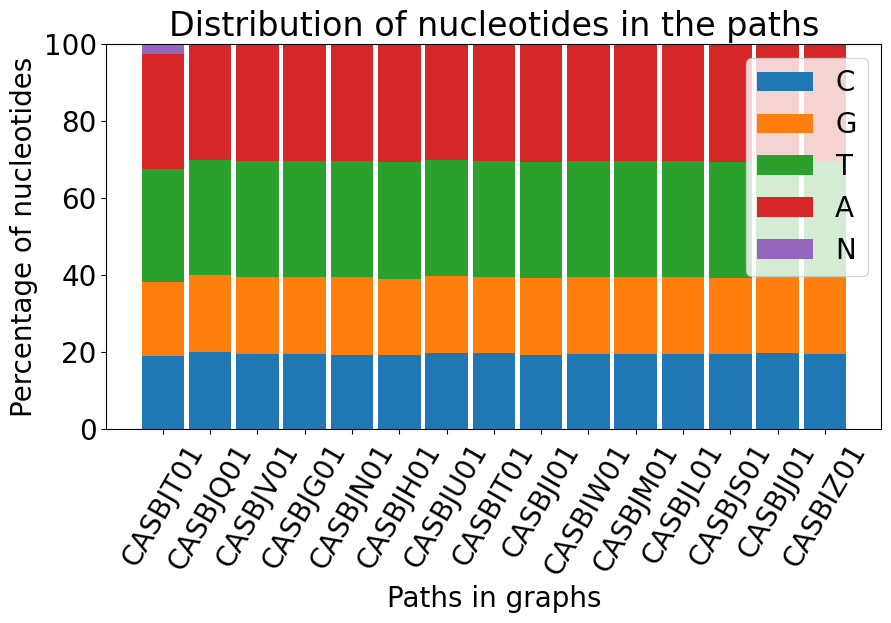

In [ ]:
# Figure size
plt.figure(figsize=(10,5))

# Width of a bar 
width = 0.9
ind = arange(len(graph_paths))

def sum_lists_diff_length(multilist:list,default:list=None):
    return ret_value if (ret_value := [sum(x) for x in zip(*map(lambda x: x + [0] * max(map(len, multilist)) if len(x) < max(map(len, multilist)) else x, multilist))]) else default


# Getting the tabs for each nucleotide
data_tables_content:list = [[gc_level[path_name].get(nucleotide,0) for path_name in graph_paths] for nucleotide in all_nucleotides]
data_total_content:list = sum_lists_diff_length(data_tables_content)
for data_list in data_tables_content:
    for i in range(len(data_list)):
        data_list[i] = data_list[i]/data_total_content[i]*100


# Plotting
for i,values in enumerate(data_tables_content):
    plt.bar(ind, values, width, label=all_nucleotides[i],bottom=sum_lists_diff_length(data_tables_content[0:i],default=[0 for _ in graph_paths]))

plt.xlabel('Paths in graphs')
plt.ylabel('Percentage of nucleotides')
plt.title('Distribution of nucleotides in the paths')

# xticks()
# First argument - A list of positions at which ticks should be placed
# Second argument -  A list of labels to place at the given locations
plt.xticks(ind, graph_paths,rotation=60)

# Finding the best position for legends and putting it
plt.legend(loc='best')
plt.annotate(
"""""", (-0.01,-0.1), (0, -20), xycoords='axes fraction', textcoords='offset points', va='top')
plt.savefig("figures/nucleotides_paths_percentages.png", bbox_inches='tight')
plt.show()

Un des problèmes est de réussir à trouver une bonne représentation pour la distance au bord des noeuds des éditions.
Affichage de la distance à n'importe quel bord des éditions ?

(0.0, 10.0)

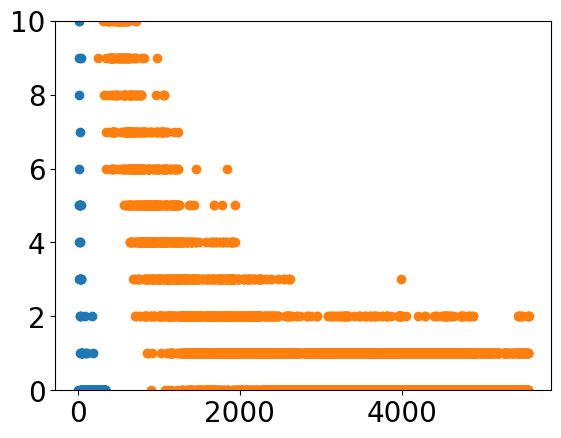

In [ ]:
deltas_counts:Counter=Counter(deltas)
deltas_before_counts:Counter=Counter(deltas_before)
plt.scatter([i for i in range(max(deltas))],[deltas_counts.get(i,0) for i in range(max(deltas))])
plt.scatter([i+1 for i in range(max(deltas_before))],[deltas_before_counts.get(i+1,0) for i in range(max(deltas_before))])
plt.ylim(0,10)

On va d'abord calculer les projections des noeuds d'un graphe sur l'autre.
Une fois que cette opération sera faite, on pourra utiliser la librairie MNE pour représenter la projection et la segmentation d'un unique noeud.

In [ ]:
def compute_projection(node:str,graph_A:Graph,graph_B:Graph) -> dict[str,list[list[str]]]:
    """Renvoie la/les liste.s des noeuds du grapheB qui sont la projection du noeud du grapheA
    Se base sur les tags PO qui sont supposés être précalculés

    Returns:
        dict[str,list[list[str]]]: liste de projections par chemin
    """
    projections:dict = dict()
    if node not in graph_A.segments.keys():
        return projections
    for path_name,po_tag_list in graph_A.segments[node]['PO'].items():
        projections[path_name] = list()
        for start_ofs,stop_ofs,_ in po_tag_list:
            encountered_nodes:dict = dict()
            for pggb_node,_ in graph_B.paths[path_name]['path']:
                encountered_nodes[pggb_node] = 1 + encountered_nodes.get(pggb_node,-1)
                po_start,po_end,_ = graph_B.segments[pggb_node]['PO'][path_name][encountered_nodes[pggb_node]]
                if po_end > start_ofs and po_start < stop_ofs:
                    projections[path_name].append(pggb_node)
    return projections

def number_nodes_in_projection(projections:dict) -> int:
    return len(set().union(*[x for x in projections.values()]))

def max_density(projections:dict) -> int:
    return max([len(x) for x in projections.values()])

Démo du fonctionnement du calcul de projection

In [ ]:
print(f"Computing projections for node {(cactus_node := choice(list(nodes_A_in_editions)))} with {len(cactus_gfa.segments[cactus_node]['PO'])} paths in it.")
compute_projection(cactus_node,cactus_gfa,pggb_gfa)

Computing projections for node 33231 with 2 paths in it.


{'CASBJI01': ['20502'], 'CASBJU01': ['22319']}

On peut calculer, pour chaque noeud, l'ensemble des projections sur l'autre graphe. C'est une autre forme de mesure de densité.
On peut comparer cette densité à la densité brute, pour voir si dans la moyenne on a la même densité de projection pour les noeuds édités et non édités.

In [ ]:
nodes_A_not_in_editions:set = set(cactus_gfa.segments.keys()) - nodes_A_in_editions
sample:int = 1000
alpha = choices(list(nodes_A_in_editions),k=sample)
beta = choices(list(nodes_A_not_in_editions),k=sample)


dataset_densities:list = [
    [
        number_nodes_in_projection(
            compute_projection(
                my_node,
                cactus_gfa,
                pggb_gfa
            )
        ) for my_node in alpha
    ],
    [
        number_nodes_in_projection(
            compute_projection(
                my_node,
                cactus_gfa,
                pggb_gfa
            )
        ) for my_node in beta
    ],
    [
        max_density(
            compute_projection(
                my_node,
                cactus_gfa,
                pggb_gfa
            )
        ) for my_node in alpha
    ],
    [
        max_density(
            compute_projection(
                my_node,
                cactus_gfa,
                pggb_gfa
            )
        ) for my_node in beta
    ]
]

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "/home/sidubois/.local/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3526, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/tmp/ipykernel_72066/821692796.py", line 17, in <module>
    [
  File "/tmp/ipykernel_72066/821692796.py", line 19, in <listcomp>
    compute_projection(
  File "/tmp/ipykernel_72066/3174687300.py", line -1, in compute_projection
KeyboardInterrupt

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/sidubois/.local/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 2120, in showtraceback
    stb = self.InteractiveTB.structured_traceback(
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/sidubois/.local/lib/python3.11/site-packages/IPython/core/ultratb.py", line 1435, in structured_traceback
    return FormattedTB.structured_traceback(
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

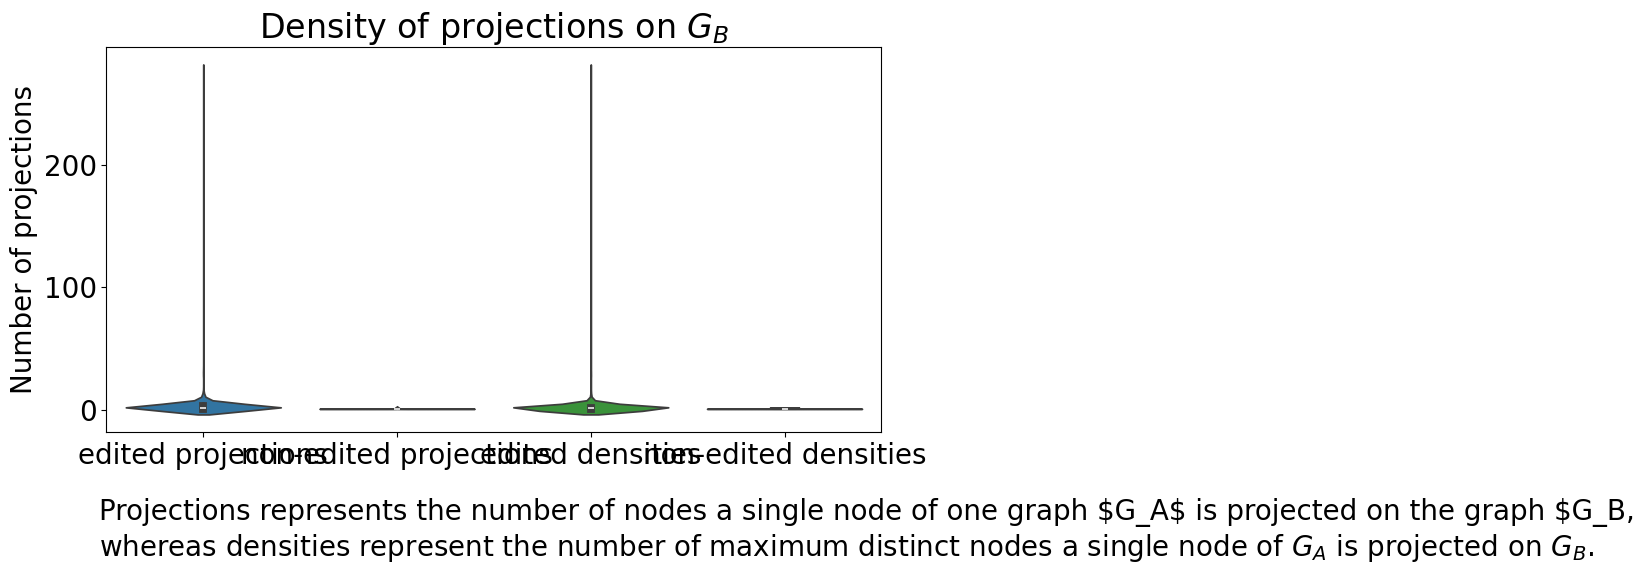

In [ ]:
# Affichage des densités de projections
plt.figure(figsize=(10,5))
violinplot(data=dataset_densities)
plt.title("Density of projections on $G_B$")
plt.xticks([0,1,2,3], ['edited projections','non-edited projections','edited densities','non-edited densities'])
plt.ylabel("Number of projections")
plt.annotate(
"""Projections represents the number of nodes a single node of one graph $G_A$ is projected on the graph $G_B,
whereas densities represent the number of maximum distinct nodes a single node of $G_A$ is projected on $G_B$.""", (-0.01,-0.1), (0, -20), xycoords='axes fraction', textcoords='offset points', va='top')
plt.savefig("figures/projections_B.png", bbox_inches='tight')

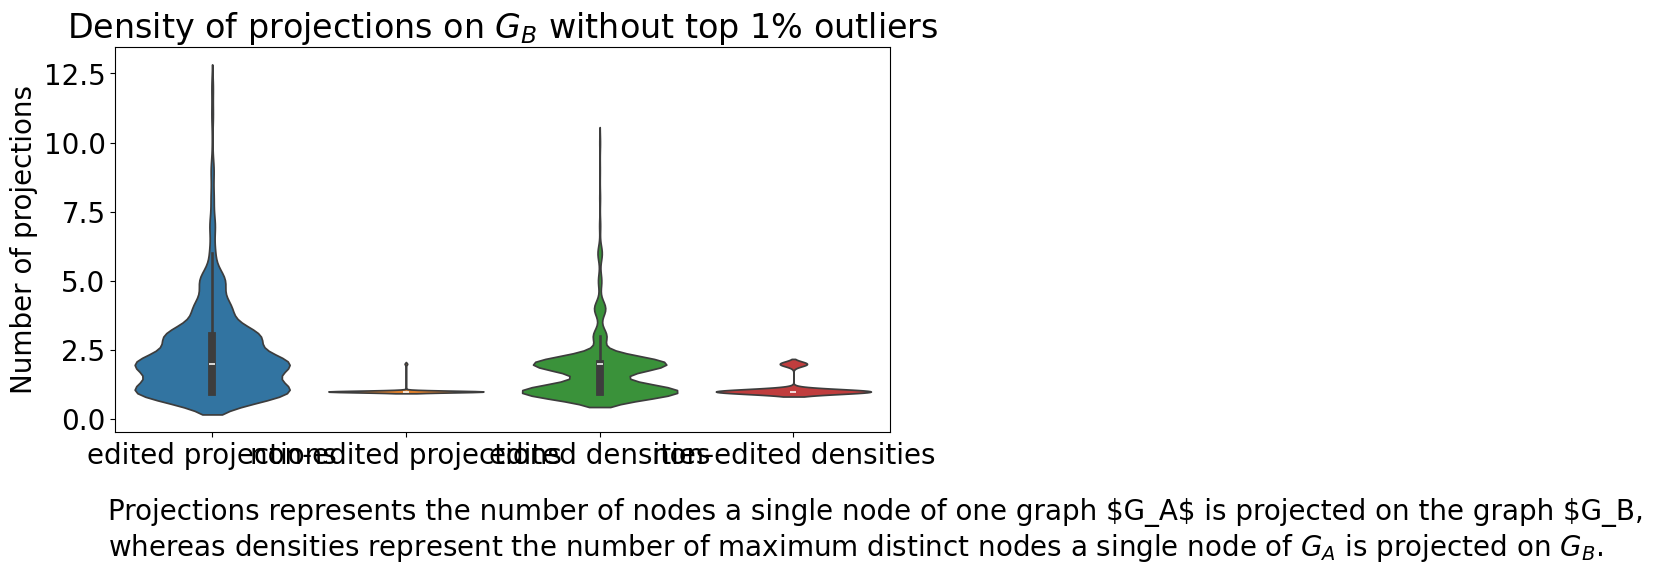

In [ ]:
# Affichage des densités de projections sans 1% outliers
plt.figure(figsize=(10,5))
violinplot(data=[sorted(x)[:-int(len(x)*.01)] for x in dataset_densities])
plt.title("Density of projections on $G_B$ without top 1% outliers")
plt.xticks([0,1,2,3], ['edited projections','non-edited projections','edited densities','non-edited densities'])
plt.ylabel("Number of projections")
plt.annotate(
"""Projections represents the number of nodes a single node of one graph $G_A$ is projected on the graph $G_B,
whereas densities represent the number of maximum distinct nodes a single node of $G_A$ is projected on $G_B$.""", (-0.01,-0.1), (0, -20), xycoords='axes fraction', textcoords='offset points', va='top')
plt.savefig("figures/projections_no_outliers_B.png", bbox_inches='tight')

Est-ce que les grands noeuds sont coupés uniquement aux extrémités ?

KeyError: 'CASBIW01#0#CASBIW01#0'

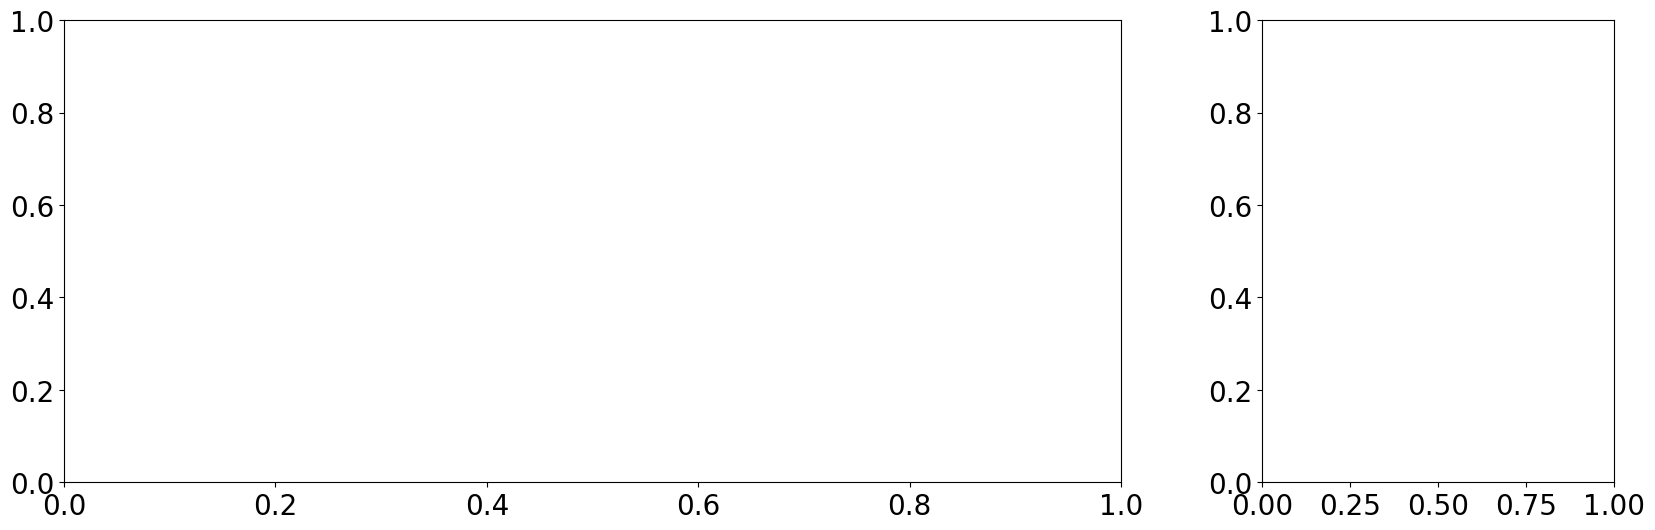

In [ ]:
seed(124)
plt.rcParams.update({'font.size': 20})

for threshold in range(1,2):
    fig, (ax1,ax2) = plt.subplots(1,2, figsize=(20,6), gridspec_kw={'width_ratios': [3, 1]})

    deltas_before:list[int] = list()
    deltas_before_max:list[int] = list()
    deltas_rand_before:list[int] = list()
    deltas_rand_before_max:list[int] = list()
    treated_nodes:set[tuple] = set()
    for path_name,edition_profile in editions.items():
        if path_name == 'CASBJU01':
            indic:str = path_name
        else:
            indic:str = f"{path_name}#0#{path_name}#0"
        for edit_type in ['merges','splits']:
            for position,[node_A,node_B] in edition_profile[edit_type]:
                if (node_A,node_B) not in treated_nodes:
                    # Merges are read on the first graph, whereas splits are on the second
                    if edit_type == 'merges' and cactus_gfa.segments[node_A]['length']>= threshold:
                        for ofs_start,ofs_end,_ in cactus_gfa.segments[node_A]['PO'][indic]:
                            if position >= ofs_start and position <= ofs_end:
                                rand_pos:int = randint(ofs_start,ofs_end)
                                deltas_before.append(min(abs(ofs_end-position),abs(position-ofs_start)))
                                deltas_before_max.append(max(abs(ofs_end-position),abs(position-ofs_start)))
                                deltas_rand_before.append(min(abs(ofs_end-rand_pos),abs(rand_pos-ofs_start)))
                                deltas_rand_before_max.append(max(abs(ofs_end-rand_pos),abs(rand_pos-ofs_start)))
                    elif edit_type == 'splits' and pggb_gfa.segments[node_B]['length'] >= threshold:
                        for ofs_start,ofs_end,_ in pggb_gfa.segments[node_B]['PO'][path_name]:
                            if position >= ofs_start and position <= ofs_end:
                                rand_pos:int = randint(ofs_start,ofs_end)
                                deltas_before.append(min(abs(ofs_end-position),abs(position-ofs_start)))
                                deltas_before_max.append(max(abs(ofs_end-position),abs(position-ofs_start)))
                                deltas_rand_before.append(min(abs(ofs_end-rand_pos),abs(rand_pos-ofs_start)))
                                deltas_rand_before_max.append(max(abs(ofs_end-rand_pos),abs(rand_pos-ofs_start)))
                    treated_nodes.add((node_A,node_B))

    node_deltas_sizes_before: list[int] = [0 for _ in node_class_sizes]
    node_deltas_lengths_before: list[int] = [0 for _ in node_class_sizes]

    del treated_nodes
    for delt in deltas_before:
        for i,(lower_bound,upper_bound) in enumerate(node_class_sizes):
            if delt >= lower_bound and delt <= upper_bound:
                node_deltas_sizes_before[i] += 1
                node_deltas_lengths_before[i] += delt


    deltas_before_counts:Counter=Counter(deltas_before)
    deltas_before_counts_max:Counter=Counter(deltas_before_max)
    deltas_rand_before_counts:Counter=Counter(deltas_rand_before)
    deltas_rand_before_counts_max:Counter=Counter(deltas_rand_before_max)
    ax1.plot([i+1 for i in range(max(deltas_before))],[deltas_before_counts.get(i+1,0) for i in range(max(deltas_before))],label='$min real$',color=colors['pink'],linewidth=3)
    ax1.plot([i+1 for i in range(max(deltas_before_max))],[deltas_before_counts_max.get(i+1,0) for i in range(max(deltas_before_max))], label='$max real$',color=colors['red'],linewidth=3)
    ax1.plot([i+1 for i in range(max(deltas_rand_before))],[deltas_rand_before_counts.get(i+1,0) for i in range(max(deltas_rand_before))],label='$min sim$',color=colors['yellow'],linewidth=3)
    ax1.plot([i+1 for i in range(max(deltas_rand_before_max))],[deltas_rand_before_counts_max.get(i+1,0) for i in range(max(deltas_rand_before_max))], label='$max sim$',color=colors['orange'],linewidth=3)
    ax1.legend()

    ax2.boxplot([
        [deltas_before[i]/deltas_before_max[i]*50 for i in range(len(deltas_before))],
        [deltas_rand_before[i]/deltas_rand_before_max[i]*50 for i in range(len(deltas_rand_before))],
    ],whiskerprops = dict(linewidth=3),
    boxprops= dict(linewidth=3),
    capprops= dict(linewidth=3),
    medianprops={"linewidth": 3, "color": colors['red'],},
    )
    ax1.set_ylabel(f"Edition count")
    ax1.set_xlabel(f"Edition size")
    ax1.set_title(f"Distance to breakpoints")
    #ax1.set_title(f"Distance to breakpoints for l$\geq {threshold}$")
    
    ax1.scatter([i+1 for i in range(max(deltas_before))][0],[deltas_before_counts.get(i+1,0) for i in range(max(deltas_before))][0],color=colors['pink'])
    ax1.annotate(f"{deltas_before_counts.get(1,0)}",([i+1 for i in range(max(deltas_before))][0],[deltas_before_counts.get(i+1,0) for i in range(max(deltas_before))][0]),textcoords="offset points",xytext=(35,-8),ha='center')

    ax1.scatter([i+1 for i in range(max(deltas_rand_before))][0],[deltas_rand_before_counts.get(i+1,0) for i in range(max(deltas_rand_before))][0],color=colors['yellow'])
    ax1.annotate(f"{deltas_rand_before_counts.get(1,0)}",([i+1 for i in range(max(deltas_rand_before))][0],[deltas_rand_before_counts.get(i+1,0) for i in range(max(deltas_rand_before))][0]),textcoords="offset points",xytext=(35,-8),ha='center')

    ax1.scatter([i+1 for i in range(max(deltas_before_max))][0],[deltas_before_counts_max.get(i+1,0) for i in range(max(deltas_before_max))][0],color=colors['red'])
    ax1.annotate(f"{deltas_before_counts_max.get(1,0)}",([i+1 for i in range(max(deltas_before_max))][0],[deltas_before_counts_max.get(i+1,0) for i in range(max(deltas_before_max))][0]),textcoords="offset points",xytext=(35,-8),ha='center')
    
    ax1.scatter([i+1 for i in range(max(deltas_rand_before_max))][0],[deltas_rand_before_counts_max.get(i+1,0) for i in range(max(deltas_rand_before_max))][0],color=colors['orange'])
    ax1.annotate(f"{deltas_rand_before_counts_max.get(1,0)}",([i+1 for i in range(max(deltas_rand_before_max))][0],[deltas_rand_before_counts_max.get(i+1,0) for i in range(max(deltas_rand_before_max))][0]),textcoords="offset points",xytext=(30,-8),ha='center')

    ax1.set_xlim(0,50)

    #ax2.set_title(f"Ratio $min/max$ for l$\geq {threshold}$")
    ax2.set_title(f"Ratio $min/max$")
    ax2.set_xticks([1,2],['real','sim'])
    ax2.set_ylabel("Percentage to any breakpoint")
    plt.savefig(f"temp/anim_breakpoints_{str(threshold).zfill(3)}.png",bbox_inches='tight')
    
    xreal = [deltas_before_counts.get(i+1,0) for i in range(max(deltas_before))][0]
    xsim = [deltas_rand_before_counts.get(i+1,0) for i in range(max(deltas_rand_before))][0]
    
    print(xsim)
    print(xreal)
    
    print(xreal/xsim*100)

    ax1.annotate(
"""The distances to breakpoints represent the distances from any editions to any border of node they are included in. A $min$ distance of 1 means the edition
happens at a distance of one basepair from the left or right tip of the node, while a max distance of 10 means the farthest distance to a breakpoint is of
size 10 for this edition.""", (-0.01,-0.1), (0, -20), xycoords='axes fraction', textcoords='offset points', va='top')

    ax2.annotate(
"""As we compute the ratio between min and max, the
max value is reached if the edition is at the exact
center of the node, while the lowest values correspond
to editions at the border of nodes""", (-0.01,-0.1), (0, -20), xycoords='axes fraction', textcoords='offset points', va='top')


### Représentation des classes de taille de noeuds par chemin

- Subdiviser en plus de classes
- Choisir quelques génomes à des points différents du clustering

CASBIW01 : [1193, 1092, 359, 106] - [5376, 1505, 1846, 1052]
CASBJG01 : [1668, 1503, 491, 165] - [5907, 1636, 2004, 1054]
CASBJJ01 : [2848, 2142, 479, 154] - [6950, 2308, 2326, 1056]
CASBJT01 : [771, 660, 242, 89] - [4398, 1135, 1688, 987]
CASBIZ01 : [1095, 750, 173, 87] - [3994, 964, 1584, 1008]
CASBJQ01 : [2824, 2066, 438, 119] - [6594, 2201, 2287, 1025]
CASBJS01 : [842, 723, 293, 124] - [4724, 1225, 1756, 1093]
CASBJV01 : [4693, 3244, 451, 70] - [8182, 3025, 2688, 1018]
CASBIT01 : [2376, 1840, 416, 107] - [5786, 1678, 1914, 1030]
CASBJU01 : [3221, 2434, 583, 157] - [7175, 2325, 2384, 1047]
CASBJL01 : [1511, 1470, 542, 187] - [6027, 1665, 2032, 1056]
CASBJM01 : [4850, 3229, 537, 108] - [7898, 2996, 2677, 1018]
CASBJI01 : [3023, 2228, 441, 111] - [6891, 2306, 2313, 1030]
CASBJN01 : [1334, 1211, 488, 168] - [5750, 1583, 1968, 1054]
CASBJH01 : [1465, 1217, 429, 161] - [5291, 1375, 1879, 1103]


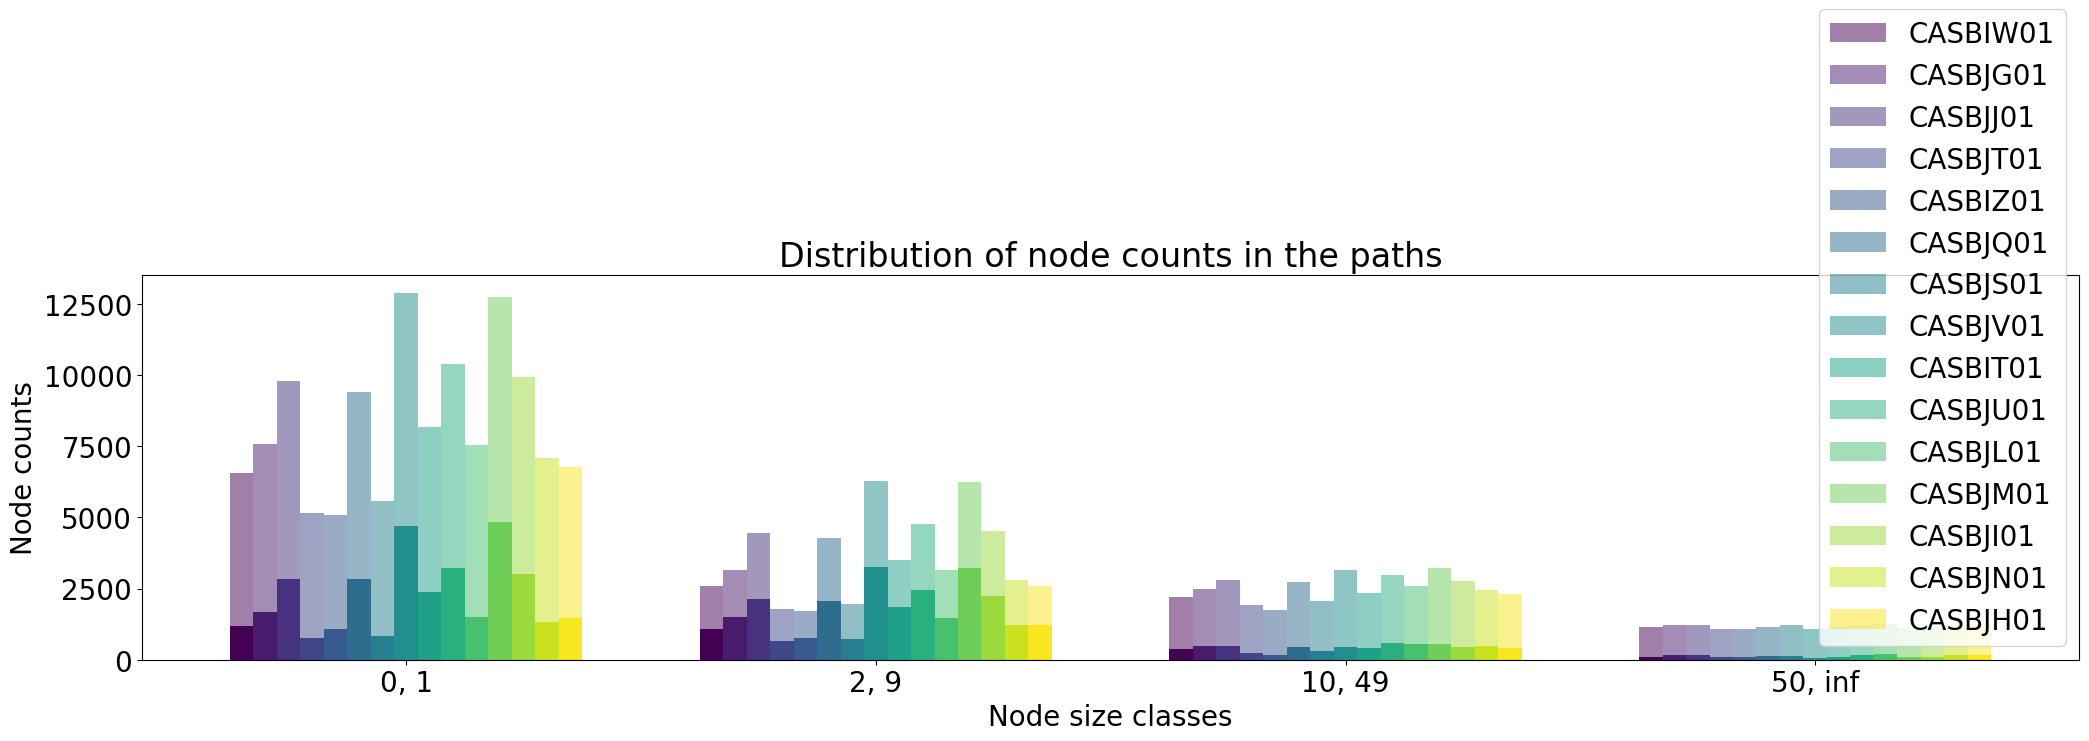

In [ ]:
# Affichage des classes de noeuds

# Position of bars on x-axis
ind = arange(len(node_class_sizes))

# Figure size
plt.figure(figsize=(25,5))

# Width of a bar 
width = 0.05

path_palette:list = get_palette_from_list(list(range(len(graph_paths))))   

# Plotting
for j,path_name in enumerate(graph_paths):
    edited_path_nodes:list = [0 for _ in node_class_sizes]
    raw_path_nodes:list = [0 for _ in node_class_sizes]
    
    for node,_ in cactus_gfa.paths[path_name]['path']:
        for i,(inf,sup) in enumerate(node_class_sizes):
            if cactus_gfa.segments[node]['length'] >= inf and cactus_gfa.segments[node]['length'] <= sup:
                if node in nodes_A_in_editions:
                    edited_path_nodes[i] += 1
                else:
                    raw_path_nodes[i] += 1
    print(f"{path_name} : {edited_path_nodes} - {raw_path_nodes}")
    plt.bar(ind+width*j, edited_path_nodes, width,color=path_palette[j],)
    plt.bar(ind+width*j, raw_path_nodes, width, label=f'{path_name}',color=path_palette[j], bottom=edited_path_nodes, alpha=.5)


plt.xlabel('Node size classes')
plt.ylabel('Node counts')
plt.title('Distribution of node counts in the paths')

# xticks()
# First argument - A list of positions at which ticks should be placed
# Second argument -  A list of labels to place at the given locations
plt.xticks(ind + width*len(graph_paths)/2 -.025, [str(x)[1:-1] for x in node_class_sizes])

# Finding the best position for legends and putting it
plt.legend(loc='best')
plt.annotate(
"""""", (-0.01,-0.1), (0, -20), xycoords='axes fraction', textcoords='offset points', va='top')
plt.savefig("figures/nodes_counts_distribution_paths.png", bbox_inches='tight')
plt.show()

CASBIW01 : [1193, 4139, 7783, 14235] - [5376, 6821, 45046, 110243]
CASBJG01 : [1668, 5719, 10992, 16888] - [5907, 7432, 48714, 109144]
CASBJJ01 : [2848, 7515, 10446, 22307] - [6950, 10330, 54503, 110185]
CASBJT01 : [771, 2580, 5414, 21083] - [4398, 5438, 41598, 108772]
CASBIZ01 : [1095, 2511, 3935, 24439] - [3994, 4583, 39829, 105923]
CASBJQ01 : [2824, 7155, 9152, 24425] - [6594, 9917, 53607, 107205]
CASBJS01 : [842, 2842, 6554, 25787] - [4724, 5719, 43687, 116320]
CASBJV01 : [4693, 11005, 8934, 7496] - [8182, 13532, 60903, 106169]
CASBIT01 : [2376, 6712, 8746, 15528] - [5786, 7580, 46311, 107272]
CASBJU01 : [3221, 8672, 12332, 16121] - [7175, 10419, 55788, 108696]
CASBJL01 : [1511, 5514, 12060, 19169] - [6027, 7515, 49438, 109281]
CASBJM01 : [4850, 11015, 11222, 13758] - [7898, 13418, 60553, 106169]
CASBJI01 : [3023, 7842, 9208, 25770] - [6891, 10312, 53914, 107199]
CASBJN01 : [1334, 4654, 11204, 22262] - [5750, 7221, 47903, 115178]
CASBJH01 : [1465, 4694, 9501, 28655] - [5291, 6346, 

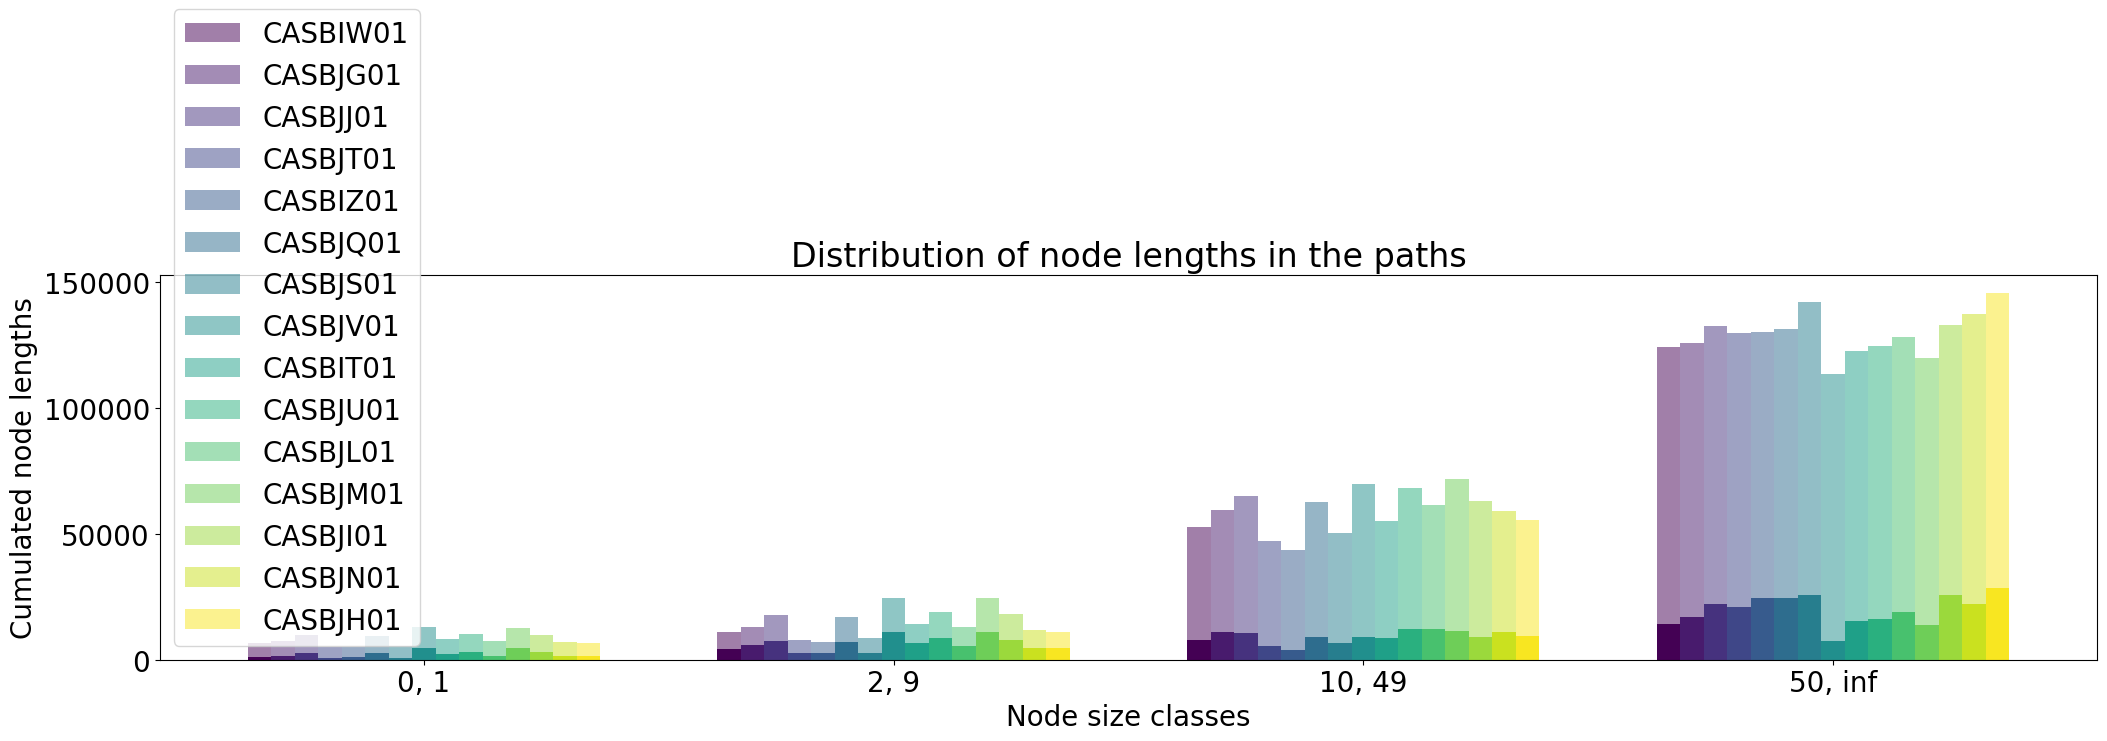

<Figure size 640x480 with 0 Axes>

In [ ]:
# Affichage des classes de noeuds

# Position of bars on x-axis
ind = arange(len(node_class_sizes))

# Figure size
plt.figure(figsize=(25,5))

# Width of a bar 
width = 0.05

path_palette:list = get_palette_from_list(list(range(len(graph_paths))))   

# Plotting
for j,path_name in enumerate(graph_paths):
    edited_path_nodes:list = [0 for _ in node_class_sizes]
    raw_path_nodes:list = [0 for _ in node_class_sizes]
    
    for node,_ in cactus_gfa.paths[path_name]['path']:
        for i,(inf,sup) in enumerate(node_class_sizes):
            if cactus_gfa.segments[node]['length'] >= inf and cactus_gfa.segments[node]['length'] <= sup:
                if node in nodes_A_in_editions:
                    edited_path_nodes[i] += cactus_gfa.segments[node]['length']
                else:
                    raw_path_nodes[i] += cactus_gfa.segments[node]['length']
    print(f"{path_name} : {edited_path_nodes} - {raw_path_nodes}")
    plt.bar(ind+width*j, edited_path_nodes, width,color=path_palette[j],)
    plt.bar(ind+width*j, raw_path_nodes, width, label=f'{path_name}',color=path_palette[j], bottom=edited_path_nodes, alpha=.5)


plt.xlabel('Node size classes')
plt.ylabel('Cumulated node lengths')
plt.title('Distribution of node lengths in the paths')

# xticks()
# First argument - A list of positions at which ticks should be placed
# Second argument -  A list of labels to place at the given locations
plt.xticks(ind + width*len(graph_paths)/2 -.025, [str(x)[1:-1] for x in node_class_sizes])

# Finding the best position for legends and putting it
plt.legend(loc='best')
plt.annotate(
"""""", (-0.01,-0.1), (0, -20), xycoords='axes fraction', textcoords='offset points', va='top')
plt.show()
plt.savefig("figures/nodes_lengths_distribution_paths.png", bbox_inches='tight')

### Clustering des partages de noeuds

- mettre en lien l'arbre obtenu avec la mash distance
- à exprimer en noeuds et en bp
- en virant les SNPs

... en faisant un clustering des SNPs uniquement

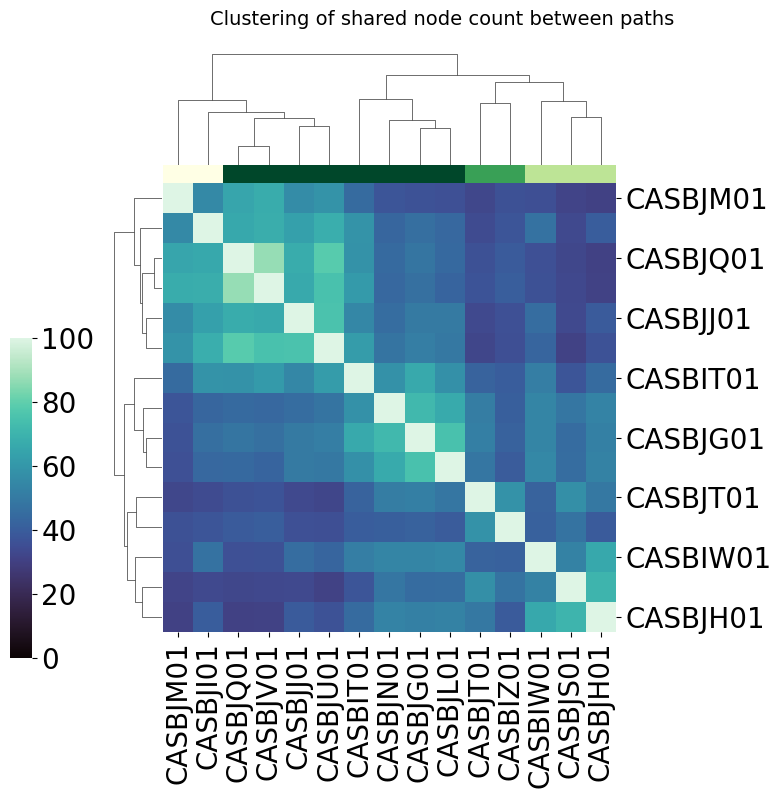

In [ ]:
node_share_clustering:list[list] = [
    [
        len(set([x for (x,_) in cactus_gfa.paths[xpath]['path']]).intersection(set([x for (x,_) in cactus_gfa.paths[ypath]['path']])))/len(set([x for (x,_) in cactus_gfa.paths[xpath]['path']]).union(set([x for (x,_) in cactus_gfa.paths[ypath]['path']])))*100 for ypath in graph_paths
    ] for xpath in graph_paths
]
row_colors = get_palette_from_list([int(color_list['leaves_color_list'][color_list['ivl'].index(l)][1]) for l in graph_paths],cmap_name='YlGn')

df_clustering = DataFrame(node_share_clustering, graph_paths, graph_paths) 

ax = clustermap(
    df_clustering,
    figsize=(7.2, 8),
    cmap="mako",
    vmin=0,
    vmax=100,
    dendrogram_ratio=(.1, .2),
    cbar_pos=(-0.1, .2, .03, .4),
    col_colors=row_colors,
)
ax.figure.suptitle('Clustering of shared node count between paths',y=1.01, fontsize = 14)
plt.savefig("figures/clustering_shared_counts.png", bbox_inches='tight')

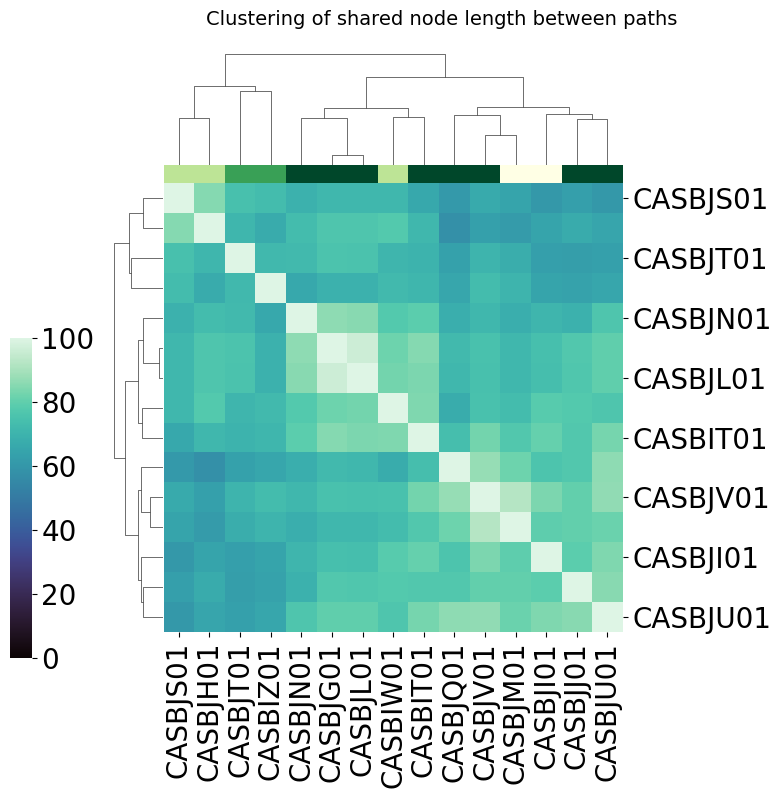

In [ ]:
node_share_clustering:list[list] = [
    [
        sum([cactus_gfa.segments[y]['length'] for y in set([x for (x,_) in cactus_gfa.paths[xpath]['path']]).intersection(set([x for (x,_) in cactus_gfa.paths[ypath]['path']]))])/sum([cactus_gfa.segments[y]['length'] for y in set([x for (x,_) in cactus_gfa.paths[xpath]['path']]).union(set([x for (x,_) in cactus_gfa.paths[ypath]['path']]))])*100 for ypath in graph_paths
    ] for xpath in graph_paths
]
row_colors = get_palette_from_list([int(color_list['leaves_color_list'][color_list['ivl'].index(l)][1]) for l in graph_paths],cmap_name='YlGn')

df_clustering = DataFrame(node_share_clustering, graph_paths, graph_paths) 

ax = clustermap(
    df_clustering,
    figsize=(7.2, 8),
    cmap="mako",
    vmin=0,
    vmax=100,

    dendrogram_ratio=(.1, .2),
    cbar_pos=(-0.1, .2, .03, .4),
    col_colors=row_colors,
)
ax.figure.suptitle('Clustering of shared node length between paths',y=1.01, fontsize = 14)
plt.savefig("figures/clustering_shared_lengths.png", bbox_inches='tight')

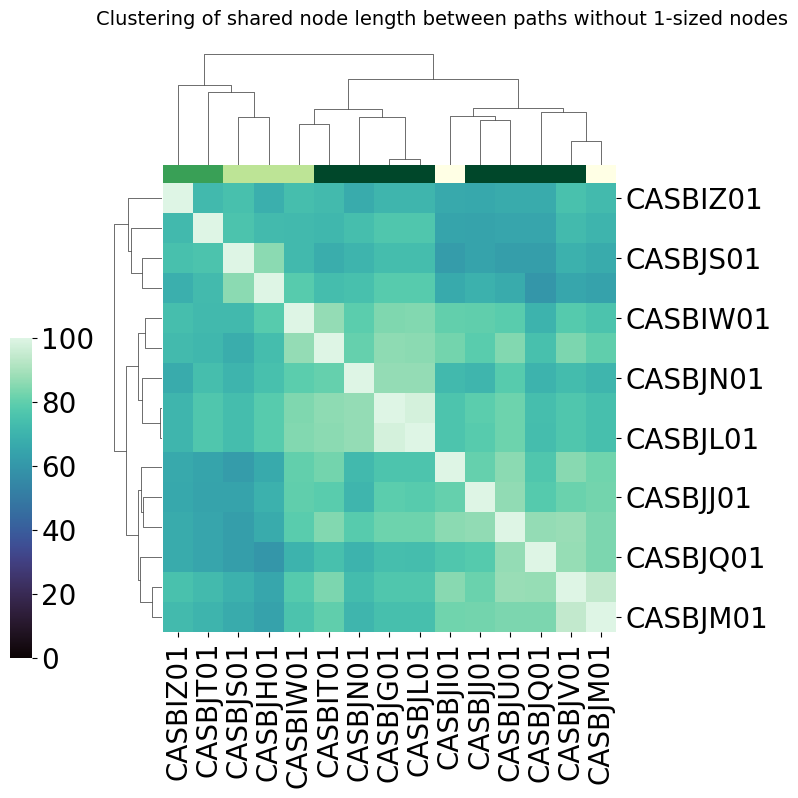

In [ ]:
path_minus_1_sized:dict[str,list] = {
    path_name:[x for (x,_) in cactus_gfa.paths[path_name]['path'] if cactus_gfa.segments[x]['length'] > 1] for path_name in graph_paths
}

node_share_clustering:list[list] = [
    [
        sum([cactus_gfa.segments[y]['length'] for y in set(path_minus_1_sized[xpath]).intersection(set(path_minus_1_sized[ypath]))])/sum([cactus_gfa.segments[y]['length'] for y in set(path_minus_1_sized[xpath]).union(set(path_minus_1_sized[ypath]))])*100 for ypath in graph_paths
    ] for xpath in graph_paths
]
row_colors = get_palette_from_list([int(color_list['leaves_color_list'][color_list['ivl'].index(l)][1]) for l in graph_paths],cmap_name='YlGn')

df_clustering = DataFrame(node_share_clustering, graph_paths, graph_paths) 

ax = clustermap(
    df_clustering,
    figsize=(7.2, 8),
    cmap="mako",
    vmin=0,
    vmax=100,
    dendrogram_ratio=(.1, .2),
    cbar_pos=(-0.1, .2, .03, .4),
    col_colors=row_colors,
)
ax.figure.suptitle('Clustering of shared node length between paths without 1-sized nodes',y=1.01, fontsize = 14)
plt.savefig("figures/clustering_shared_no_outliers.png", bbox_inches='tight')

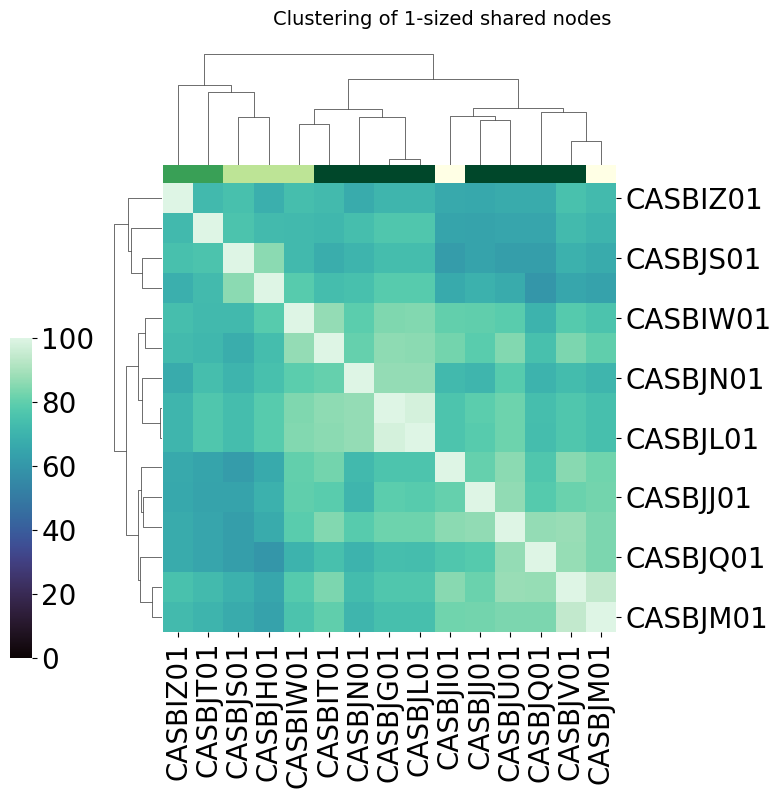

In [ ]:
path_1_sized:dict[str,list] = {
    path_name:[x for (x,_) in cactus_gfa.paths[path_name]['path'] if cactus_gfa.segments[x]['length'] == 1] for path_name in graph_paths
}

node_share_clustering:list[list] = [
    [
        sum([cactus_gfa.segments[y]['length'] for y in set(path_minus_1_sized[xpath]).intersection(set(path_minus_1_sized[ypath]))])/sum([cactus_gfa.segments[y]['length'] for y in set(path_minus_1_sized[xpath]).union(set(path_minus_1_sized[ypath]))])*100 for ypath in graph_paths
    ] for xpath in graph_paths
]
row_colors = get_palette_from_list([int(color_list['leaves_color_list'][color_list['ivl'].index(l)][1]) for l in graph_paths],cmap_name='YlGn')

df_clustering = DataFrame(node_share_clustering, graph_paths, graph_paths) 

ax = clustermap(
    df_clustering,
    figsize=(7.2, 8),
    cmap="mako",
    vmin=0,
    vmax=100,
    dendrogram_ratio=(.1, .2),
    cbar_pos=(-0.1, .2, .03, .4),
    col_colors=row_colors,
)
ax.figure.suptitle('Clustering of 1-sized shared nodes',y=1.01, fontsize = 14)
plt.savefig("figures/clustering_one_sized.png", bbox_inches='tight')

### Distribution des variants

Devrait normalement suivre les distributions des noeuds

### Corrélation entre distance mash à la référence et nombre de noeuds

- ou sinon clustering par rapport au nombre de noeuds

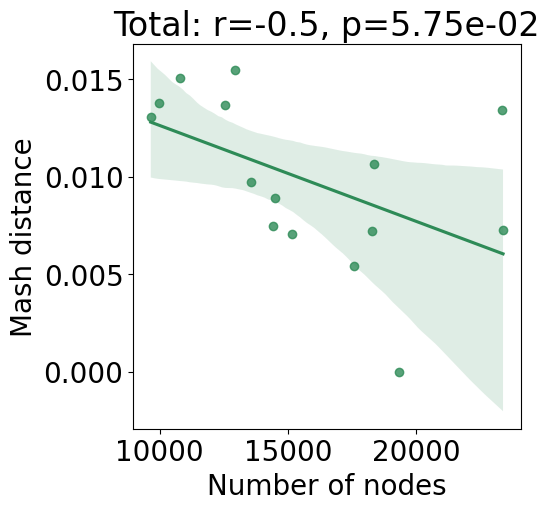

In [ ]:
# il faut une valeur de distance aux autres ou utiliser les distances à la ref ?
reference:str = 'CASBJU01'


path_lengths:dict[str,int] = {
    path_name:len(cactus_gfa.paths[path_name]['path']) for path_name in graph_paths
}

mash_dist:dict[str,float] = {
    path_name:mash[graph_paths.index(reference)][graph_paths.index(path_name)] for path_name in graph_paths
}

fig, ax = plt.subplots(figsize=(5,5))

df_ve = DataFrame([[path_lengths[path_name] for path_name in graph_paths],[mash_dist[path_name] for path_name in graph_paths]],['path_length','mash_dist'])
df_ve = df_ve.transpose()

ax.set_title(f"Total: r={round(stats.pearsonr(df_ve['path_length'], df_ve['mash_dist'])[0],2)}, p={stats.pearsonr(df_ve['path_length'], df_ve['mash_dist'])[1]:.2e}")
regplot(x='path_length', y='mash_dist', data=df_ve, ax=ax, color='seagreen')
ax.set_ylabel('Mash distance')
ax.set_xlabel('Number of nodes')

plt.savefig("figures/corellogram_mash_shared_node.png", bbox_inches='tight')

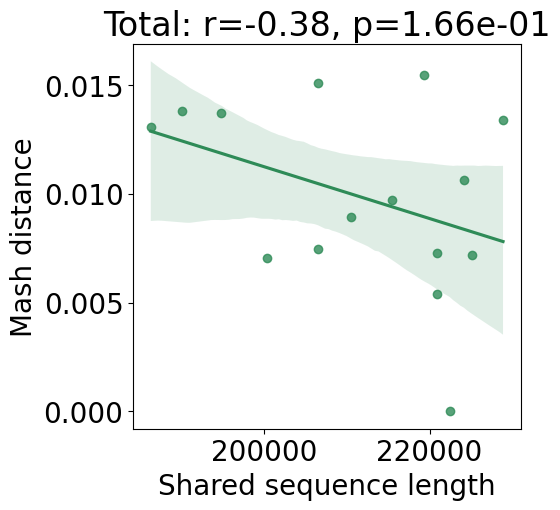

In [ ]:
# il faut une valeur de distance aux autres ou utiliser les distances à la ref ?
reference:str = 'CASBJU01'


path_lengths:dict[str,int] = {
    path_name:sum([cactus_gfa.segments[x]['length'] for x,_ in cactus_gfa.paths[path_name]['path']]) for path_name in graph_paths
}

mash_dist:dict[str,float] = {
    path_name:mash[graph_paths.index(reference)][graph_paths.index(path_name)] for path_name in graph_paths
}

fig, ax = plt.subplots(figsize=(5,5))

df_ve = DataFrame([[path_lengths[path_name] for path_name in graph_paths],[mash_dist[path_name] for path_name in graph_paths]],['path_length','mash_dist'])
df_ve = df_ve.transpose()

ax.set_title(f"Total: r={round(stats.pearsonr(df_ve['path_length'], df_ve['mash_dist'])[0],2)}, p={stats.pearsonr(df_ve['path_length'], df_ve['mash_dist'])[1]:.2e}")
regplot(x='path_length', y='mash_dist', data=df_ve, ax=ax, color='seagreen')
ax.set_ylabel('Mash distance')
ax.set_xlabel('Shared sequence length')
plt.savefig("figures/corellogram_mash_shared_length.png", bbox_inches='tight')
